In [1]:
import pandas as pd

pd.set_option('display.max_columns', 500)

# Load Data

In [2]:
df = pd.read_csv('wharton_likert_converted.csv')

df_columns = pd.read_csv("columns.csv")
df_columns["CategoryNew"] = df_columns["Category"] + "---" + df_columns['Variable name'].str.split('_', expand=True)[0]
df_columns["CategoryNew"] = df_columns["CategoryNew"].apply(lambda x: "ETC" if "Etc" in x else x)

In [3]:
df.shape, df_columns.shape

((1384, 199), (185, 4))

In [4]:
df.head(3)

DEMO_Org  DEMO_meeting_remote   DEMO_Dept  \
0    Org 2                  NaN  Accounting   
1    Org 2                  NaN  Accounting   
2    Org 2                  NaN  Accounting   

   OBSV_PreC_Location_A_primryoffice  OBSV_PreC_Location_B_officeother  \
0                                0.8                               NaN   
1                                0.6                               NaN   
2                                0.6                               NaN   

   OBSV_PreC_Location_C_client  OBSV_PreC_Location_D_WFH  \
0                          NaN                       0.2   
1                          NaN                       0.4   
2                          NaN                       0.4   

   OBSV_PreC_Location_E_publicspace  OBSV_PreC_Location_F_transit  \
0                               NaN                           NaN   
1                               NaN                           NaN   
2                               NaN                           NaN   

   OBSV_PreC_Location_G_other  OBSV_Now_Interact_Work_within_org  \
0                         NaN                                NaN   
1                         NaN                                NaN   
2                         NaN                                NaN   

   OBSV_PreC_meeting_A_inperson  OBSV_PreC_meeting_B_hyrbid  \
0                          0.25                         0.5   
1                          0.10                         0.8   
2                           NaN                         1.0   

   OBSV_PreC_meeting_C_remote  OBSV_PreC_interative_A_inperson  \
0                        0.25                              NaN   
1                        0.10                              NaN   
2                         NaN                              NaN   

   OBSV_PreC_interative_B_remote  OBSV_same_space_count_A_1  \
0                            NaN                        0.5   
1                            NaN                        0.7   
2                            NaN                        NaN   

   OBSV_same_space_count_B_2n3  OBSV_same_space_count_C_4n9  \
0                         0.25                         0.25   
1                         0.30                          NaN   
2                         1.00                          NaN   

   OBSV_same_space_count_D_10p  OBSV_PreC_meetingsize0ffice_A_1  \
0                          0.0                              NaN   
1                          NaN                              NaN   
2                          NaN                              NaN   

   OBSV_PreC_meetingsize0ffice_B_2n3  OBSV_PreC_meetingsize0ffice_C_4n9  \
0                                NaN                                NaN   
1                                NaN                                NaN   
2                                NaN                                NaN   

   OBSV_PreC_wiOffice_A_desk  OBSV_PreC_wiOffice_B_otherdeck  \
0                        0.6                             0.2   
1                        1.0                             NaN   
2                        1.0                             NaN   

   OBSV_PreC_wiOffice_C_meetingrm  OBSV_PreC_wiOffice_D_lobby  \
0                             0.2                         NaN   
1                             NaN                         NaN   
2                             NaN                         NaN   

   OBSV_PreC_wiOffice_E_speicaltyarea  OBSV_PreC_wiOffice_F_other  \
0                                 NaN                         NaN   
1                                 NaN                         NaN   
2                                 NaN                         NaN   

  OBSV_PreC_space_A_InformalMtg OBSV_PreC_space_B_FormalMtg  \
0                           NaN                         NaN   
1                           NaN                         NaN   
2                           NaN                         NaN   

   OBSV_PreC_5A_lost_layout  OBSV_PreC_5B_lost_looking  \
0                       N

In [5]:
variable_categories = df_columns['CategoryNew'].unique()
variable_categories

array(['DEMO---DEMO', 'Influental Factors---DEMO',
       'Mobility: Days remote / in-office---OBSV',
       'Interactive Work---OBSV', 'Space Types & Preferences---OBSV',
       'Workplace Satisfactoin / Perfomance---OBSV', 'Workstyle---OBSV',
       'Influental Factors---DECSN', 'Impact Distributed Wrok---PostC',
       'Mobility: Days remote / in-office---PREF',
       'Environmental Preferences---PREF',
       'Space Types & Preferences---PREF', 'Workplace Features---PREF',
       'Workplace Features---SATSF',
       'Workplace Satisfactoin / Perfomance---SATSF',
       'Workplace Characteristics---SATSF',
       'Workplace Characteristics---WP', 'ETC'], dtype=object)

In [6]:
df_columns.groupby('CategoryNew')['CategoryNew'].count()

CategoryNew
DEMO---DEMO                                     3
ETC                                             8
Environmental Preferences---PREF               14
Impact Distributed Wrok---PostC                17
Influental Factors---DECSN                     17
Influental Factors---DEMO                       1
Interactive Work---OBSV                        14
Mobility: Days remote / in-office---OBSV        8
Mobility: Days remote / in-office---PREF        1
Space Types & Preferences---OBSV                8
Space Types & Preferences---PREF                7
Workplace Characteristics---SATSF              11
Workplace Characteristics---WP                 11
Workplace Features---PREF                      26
Workplace Features---SATSF                     14
Workplace Satisfactoin / Perfomance---OBSV     12
Workplace Satisfactoin / Perfomance---SATSF    12
Workstyle---OBSV                                1
Name: CategoryNew, dtype: int64

# Subset Original Cols

In [7]:
df_og = df[[i for i in df.columns if i in df_columns["Variable name"].values]]

In [287]:
numeric_mapping_dict = {
    'Enclosed room (meeting room, phone room)': 9,
    'Workstation': 7,
    'Desk or office': 8,
    'Home': 1,
    'Semi-enclosed space (nook, booth)': 5,
    'Sit-stand workstation': 6,
    'Open space (cafe, lounge)': 4,
    'Elsewhere in the building': 3,
    'Anywhere outside the office building': 2
}

# Single Org Analysis - Org 3

In [53]:
df_single_org = df_og[df_og['DEMO_Org'] == "Org 3"].copy().reset_index(drop=True)
df_single_org.dropna(axis=1, inplace=True, thresh=df_single_org.shape[0]*0.3)
print(df_single_org.shape)

single_org_df_cols = df_columns[df_columns['Variable name'].isin(df_single_org.columns)].copy()
var_counts = single_org_df_cols.groupby('CategoryNew')['ct'].count().reset_index()
print(var_counts)

target_var = ['Mobility: Days remote / in-office---PREF']
single_var_cats = var_counts[(var_counts['ct'] == 1) & (~var_counts['CategoryNew'].isin(target_var))]['CategoryNew'].values.tolist()
exclude_vars_cat = single_var_cats + target_var + ['DEMO---DEMO']

final_select_vars_cat = [i for i in var_counts.CategoryNew.values if i not in exclude_vars_cat]
final_select_vars_cat, single_var_cats

(385, 163)
                                    CategoryNew  ct
0                                   DEMO---DEMO   2
1                                           ETC   8
2              Environmental Preferences---PREF  14
3               Impact Distributed Wrok---PostC  15
4                    Influental Factors---DECSN  15
5                     Influental Factors---DEMO   1
6                       Interactive Work---OBSV   7
7      Mobility: Days remote / in-office---OBSV   1
8      Mobility: Days remote / in-office---PREF   1
9              Space Types & Preferences---OBSV   8
10             Space Types & Preferences---PREF   7
11            Workplace Characteristics---SATSF  11
12               Workplace Characteristics---WP  11
13                    Workplace Features---PREF  23
14                   Workplace Features---SATSF  14
15   Workplace Satisfactoin / Perfomance---OBSV  12
16  Workplace Satisfactoin / Perfomance---SATSF  12
17                             Workstyle---OBSV   1


(['ETC',
  'Environmental Preferences---PREF',
  'Impact Distributed Wrok---PostC',
  'Influental Factors---DECSN',
  'Interactive Work---OBSV',
  'Space Types & Preferences---OBSV',
  'Space Types & Preferences---PREF',
  'Workplace Characteristics---SATSF',
  'Workplace Characteristics---WP',
  'Workplace Features---PREF',
  'Workplace Features---SATSF',
  'Workplace Satisfactoin / Perfomance---OBSV',
  'Workplace Satisfactoin / Perfomance---SATSF'],
 ['Influental Factors---DEMO',
  'Mobility: Days remote / in-office---OBSV',
  'Workstyle---OBSV'])

##########################################################################################
ETC

Shapes: (308, 4) (77, 4) (308,) (77,)

Scores 0.11538845539217442 245163486208589.34 0.2771271153089335



##########################################################################################

##########################################################################################
Environmental Preferences---PREF

Shapes: (308, 4) (77, 4) (308,) (77,)

Scores 0.1803363958760152 382638576458651.6 0.34019066846722795



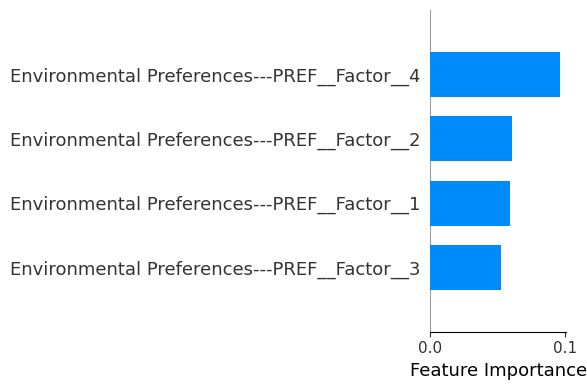

##########################################################################################

##########################################################################################
Impact Distributed Wrok---PostC

Shapes: (308, 4) (77, 4) (308,) (77,)

Scores 0.1190400032066699 137999910659758.81 0.253001443001443



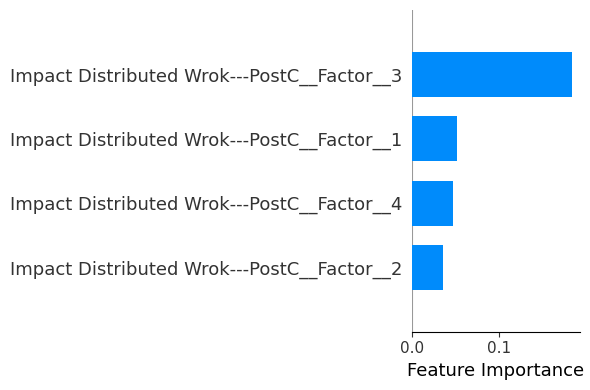

##########################################################################################

##########################################################################################
Influental Factors---DECSN

Shapes: (308, 4) (77, 4) (308,) (77,)

Scores 0.12457440365756693 46790645479174.734 0.25980519480519476



##########################################################################################

##########################################################################################
Interactive Work---OBSV

Shapes: (308, 4) (77, 4) (308,) (77,)

Scores 0.1699460250529924 338701222044815.9 0.3255870485657719



##########################################################################################

##########################################################################################
Space Types & Preferences---OBSV

Shapes: (308, 4) (77, 4) (308,) (77,)

Scores 0.16961461054837154 347483486353259.56 0.32636918128132797



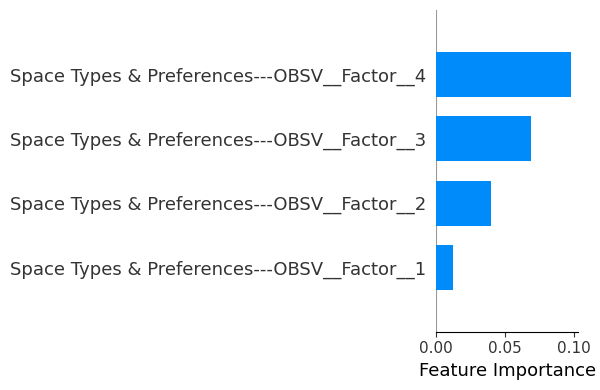

##########################################################################################

##########################################################################################
Space Types & Preferences---PREF

Shapes: (308, 4) (77, 4) (308,) (77,)

Scores 0.12541608381201524 225012871920385.56 0.2939459746602603



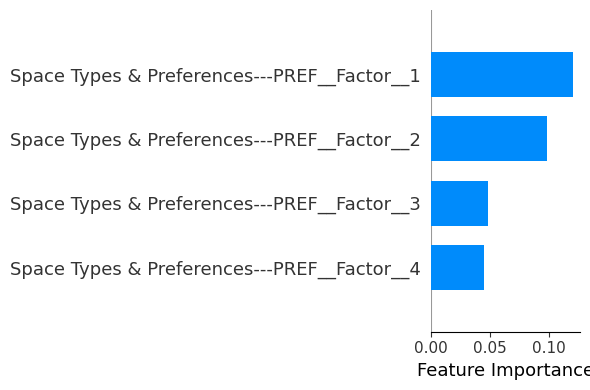

##########################################################################################

##########################################################################################
Workplace Characteristics---SATSF

Shapes: (308, 4) (77, 4) (308,) (77,)

Scores 0.13999020463888134 234207524382170.5 0.3068699416525503



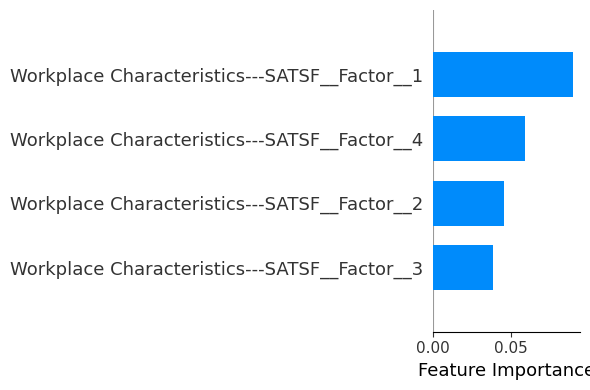

##########################################################################################

##########################################################################################
Workplace Characteristics---WP

Shapes: (308, 4) (77, 4) (308,) (77,)

Scores 0.14763823776764828 309960174724838.25 0.31388064316635744



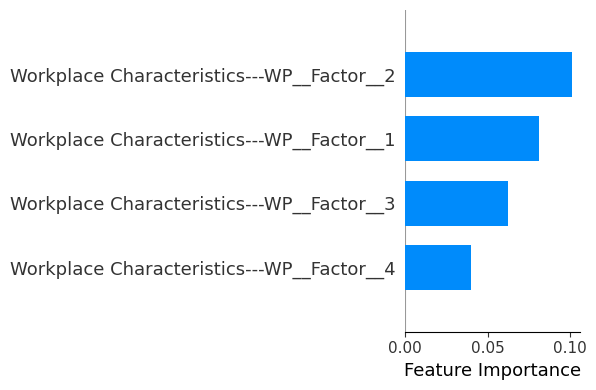

##########################################################################################

##########################################################################################
Workplace Features---PREF

Shapes: (308, 4) (77, 4) (308,) (77,)

Scores 0.13949999199034144 246028481260473.0 0.3118759001983833



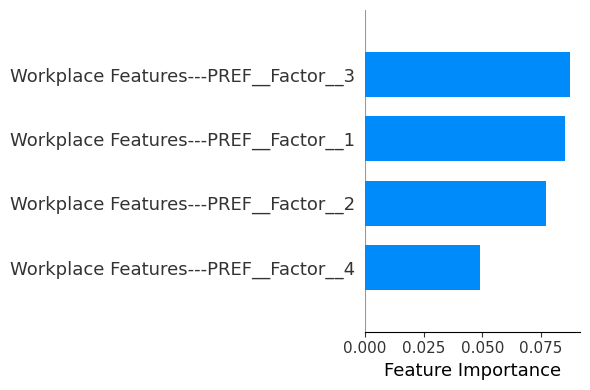

##########################################################################################

##########################################################################################
Workplace Features---SATSF

Shapes: (308, 4) (77, 4) (308,) (77,)

Scores 0.1528210930058158 254551283286159.16 0.30351214003387916



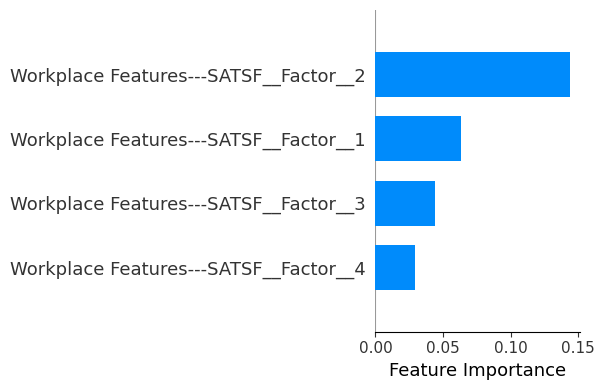

##########################################################################################

##########################################################################################
Workplace Satisfactoin / Perfomance---OBSV

Shapes: (308, 4) (77, 4) (308,) (77,)

Scores 0.15611224633618428 287137708237397.9 0.32636237139483887



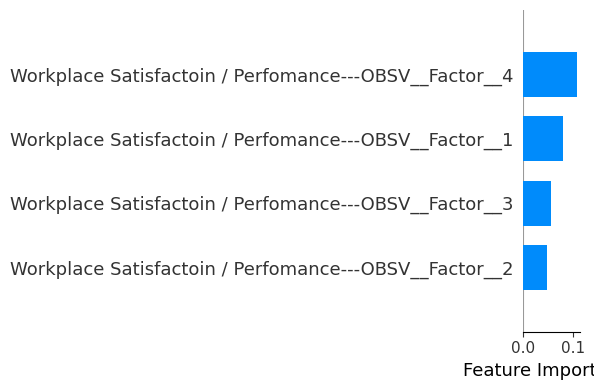

##########################################################################################

##########################################################################################
Workplace Satisfactoin / Perfomance---SATSF

Shapes: (308, 4) (77, 4) (308,) (77,)

Scores 0.10389338870190568 235572251541979.53 0.24493858484824035



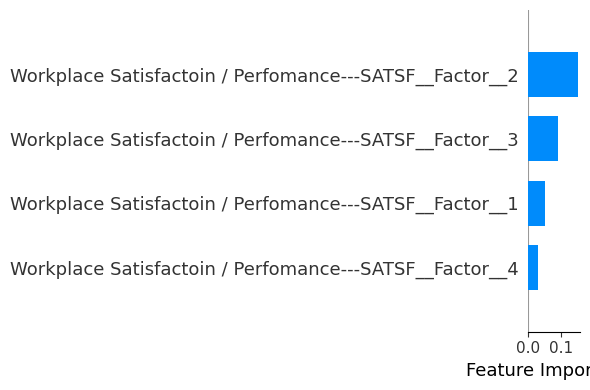

##########################################################################################



In [54]:
result_dict = dict.fromkeys(final_select_vars_cat)

supress_print = True

def model(x_train, x_test, y_train, y_test, plot_size=(6, 4), max_display=10):
    model = DecisionTreeRegressor(max_depth=10)

    model.fit(x_train, y_train)

    ### predict on test data

    y_pred = model.predict(x_test)

    ### evaluate the model

    from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error

    mse = mean_squared_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    print("Scores", mse, mape, mae, end="\n\n")   

    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(x_train)

    shap.summary_plot(shap_values, x_train, plot_type="bar", plot_size=plot_size, max_display=max_display, show=False)
    # plt.savefig('data_tool_demo/overall/shap_summary_plot_v1.png')
    plt.xlabel('Feature Importance')
    plt.show()

for var_cat in final_select_vars_cat:

    print("###"*30)
    print(var_cat, end="\n\n")
    
    cols = single_org_df_cols[single_org_df_cols['CategoryNew'] == var_cat]['Variable name'].values.tolist()
    
    num_factors = min(4, len(cols))

    subset_df_single_var_cat = df_single_org[cols].copy()

    for obj_col in subset_df_single_var_cat.dtypes[subset_df_single_var_cat.dtypes == object].index.values:
        subset_df_single_var_cat[obj_col] = subset_df_single_var_cat[obj_col].map(numeric_mapping_dict)


    subset_df_single_var_cat.fillna(-100000, inplace=True)

    scaler = StandardScaler()
    subset_df_scaled = scaler.fit_transform(subset_df_single_var_cat)
    
    fa = FactorAnalysis(n_components=num_factors, max_iter=5000)
    subset_df_factor = fa.fit_transform(subset_df_scaled)

    factor_col_names = [f"{var_cat}__Factor__{i}" for i in range(1, num_factors+1)]
    factor_df = pd.DataFrame(
        subset_df_factor,
        columns = factor_col_names
    )

    loadings = fa.components_.T  # Transpose so that variables are rows
    # Create a DataFrame for easier interpretation
    loadings_df = pd.DataFrame(
        loadings, 
        index=subset_df_single_var_cat.columns, 
        columns=factor_col_names
    )
    # Identify significant loadings and sort
    threshold = 0.2  # Set your threshold
    significant_loadings = loadings_df[abs(loadings_df) > threshold].fillna(0)

    result_dict[var_cat] = {
        'factors': factor_df,
        'loadings': significant_loadings,
    }

    if not supress_print:
        print(significant_loadings, end="\n\n")


    tgt_y_df = df_single_org[~df_single_org['PREF_WFK_rate_home'].isna()]['PREF_WFK_rate_home'].reset_index(drop=True)
    not_na_idx = tgt_y_df.index
    x_train, x_test, y_train, y_test = train_test_split(factor_df.iloc[not_na_idx], tgt_y_df, test_size=0.2, random_state=42)
    print("Shapes:", x_train.shape, x_test.shape, y_train.shape, y_test.shape, end="\n\n")

    model(x_train, x_test, y_train, y_test)

    print("###"*30, end="\n\n")

    # break
    

Shapes: (308, 55) (77, 55) (308,) (77,)

Scores 0.08779894809026796 40941814794277.72 0.2080808080808081



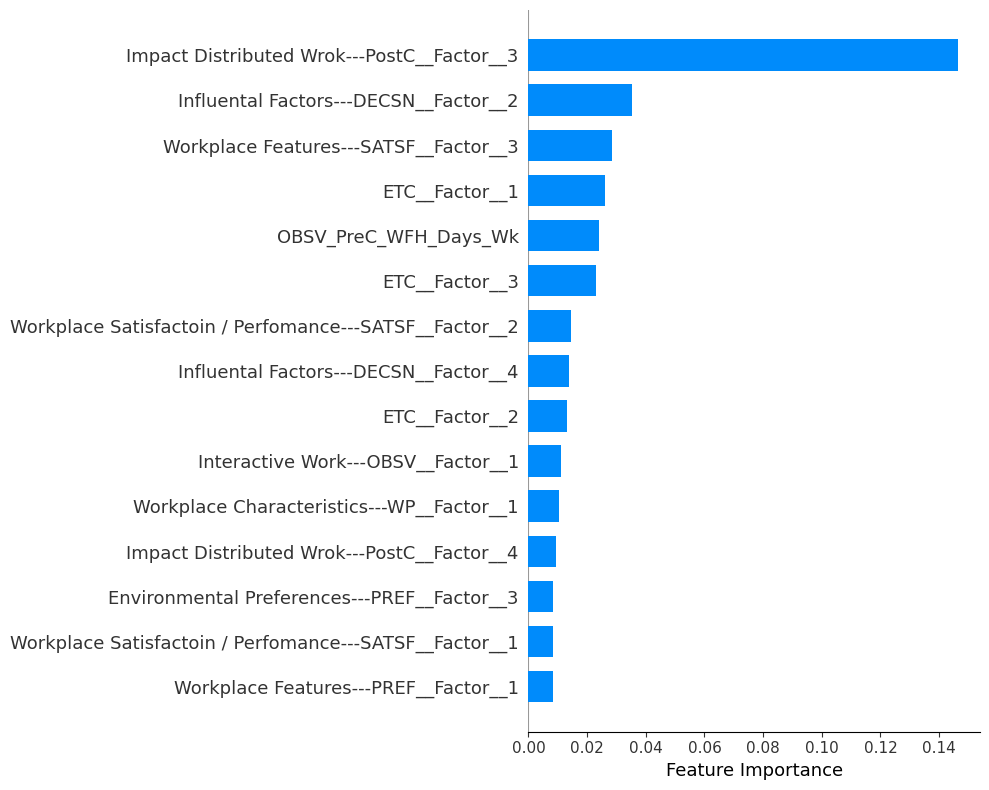

In [55]:
list_dfs_factors = [result_dict[i]['factors'] for i in result_dict.keys()]

final_df = pd.concat(
    list_dfs_factors + [df_single_org[single_org_df_cols[single_org_df_cols['CategoryNew'].isin(single_var_cats)]['Variable name'].values.tolist()]], 
    axis=1
).reset_index(drop=True)

### remove columns with zero variance
final_df = final_df.loc[:, final_df.apply(pd.Series.nunique) != 1]

tgt_y_df = df_single_org[~df_single_org['PREF_WFK_rate_home'].isna()]['PREF_WFK_rate_home'].reset_index(drop=True)
not_na_idx = tgt_y_df.index
x_train, x_test, y_train, y_test = train_test_split(final_df.iloc[not_na_idx], tgt_y_df, test_size=0.2, random_state=42)
print("Shapes:", x_train.shape, x_test.shape, y_train.shape, y_test.shape, end="\n\n")

model(x_train, x_test, y_train, y_test, (10, 8), 15)

In [56]:
result_dict['Impact Distributed Wrok---PostC']['loadings']

Impact Distributed Wrok---PostC__Factor__1  \
PostC_impact_shift_A_focus                                                    0.000000   
PostC_impact_shift_B_productive                                               0.000000   
PostC_impact_shift_C_collab                                                   0.000000   
PostC_impact_shift_E_innovate                                                 0.000000   
PostC_impact_shift_F_colleagueaccess                                          0.000000   
PostC_impact_shift_H_social                                                   0.000000   
PostC_impact_shift_I_managersconnect                                          0.000000   
PostC_impact_shift_J_client                                                   0.000000   
PostC_impact_shift_K_enjoy                                                    0.000000   
PostC_impact_RankDifficult_A_MH                                              -0.233969   
PostC_impact_RankDifficult_B_community                                       -0.244116   
PostC_impact_RankDifficult_C_Communication                                   -0.210477   
PostC_impact_RankDifficult_D_Tech                                             0.983183   
PostC_impact_RankDifficult_E_space                                            0.000000   
PostC_impact_RankDifficult_F_Environment                                      0.000000   

                                            Impact Distributed Wrok---PostC__Factor__2  \
PostC_impact_shift_A_focus                                                    0.000000   
PostC_impact_shift_B_productive                                               0.000000   
PostC_impact_shift_C_collab                                                   0.000000   
PostC_impact_shift_E_innovate                                                 0.000000   
PostC_impact_shift_F_colleagueaccess                                          0.000000   
PostC_impact_shift_H_social                                                   0.000000   
PostC_impact_shift_I_managersconnect                                          0.000000   
PostC_impact_shift_J_client                                                   0.000000   
PostC_impact_shift_K_enjoy                                                    0.000000   
PostC_impact_RankDifficult_A_MH                                               0.000000   
PostC_impact_RankDifficult_B_community                                        0.000000   
PostC_impact_RankDifficult_C_Communication                                   -0.965280   
PostC_impact_RankDifficult_D_Tech                                             0.000000   
PostC_impact_RankDifficult_E_space                                            0.368332   
PostC_impact_RankDifficult_F_Environment                                      0.394654   

                                            Impact Distributed Wrok---PostC__Factor__3  \
PostC_impact_shift_A_focus                                                   -0.867508   
PostC_impact_shift_B_productive                                              -0.845062   
PostC_impact_shift_C_collab                                                  -0.604843   
PostC_impact_shift_E_innovate                                                -0.682856   
PostC_impact_shift_F_colleagueaccess                                         -0.570633   
PostC_impact_shift_H_social                                                  -0.443531   
PostC_impact_shift_I_managersconnect                                         -0.513384   
PostC_impact_shift_J_client                                                  -0.453584   
PostC_impact_shift_K_enjoy                                                   -0.793181   
PostC_impact_RankDifficult_A_MH                                              -0.276780   
PostC_impact_RankDifficult_B_community                                        0.000000   
PostC_impact_RankDifficult_C_Communication                                    0.00

In [57]:
result_dict['Influental Factors---DECSN']['loadings']

Influental Factors---DECSN__Factor__1  \
DECSN_factors_A_noinpersonmtgs                              -0.399569   
DECSN_factors_B_healthwellness                              -0.399570   
DECSN_factors_C_WrkLifeSep                                   0.000000   
DECSN_factors_E_commutelength                                0.000000   
DECSN_factors_F_collabtools                                 -0.971475   
DECSN_factors_G_concentrate                                 -0.971482   
DECSN_factors_H_purpose                                     -0.971481   
DECSN_factors_J_teampresence                                -0.926551   
DECSN_factors_K_socialevents                                -0.971480   
DECSN_factors_L_community                                   -0.971479   
DECSN_factors_M_metorship                                   -0.971479   
DECSN_factors_N_neighorhood                                 -0.971480   
DECSN_factors_O_food                                        -0.971481   
DECSN_factors_P_family                                      -0.971484   
DECSN_factors_Q_leadership                                  -0.926555   

                                Influental Factors---DECSN__Factor__2  \
DECSN_factors_A_noinpersonmtgs                              -0.916699   
DECSN_factors_B_healthwellness                              -0.916698   
DECSN_factors_C_WrkLifeSep                                   0.000000   
DECSN_factors_E_commutelength                                0.000000   
DECSN_factors_F_collabtools                                  0.231780   
DECSN_factors_G_concentrate                                  0.231751   
DECSN_factors_H_purpose                                      0.231757   
DECSN_factors_J_teampresence                                 0.262380   
DECSN_factors_K_socialevents                                 0.231757   
DECSN_factors_L_community                                    0.231762   
DECSN_factors_M_metorship                                    0.231763   
DECSN_factors_N_neighorhood                                  0.231759   
DECSN_factors_O_food                                         0.231755   
DECSN_factors_P_family                                       0.231743   
DECSN_factors_Q_leadership                                   0.262367   

                                Influental Factors---DECSN__Factor__3  \
DECSN_factors_A_noinpersonmtgs                               0.000000   
DECSN_factors_B_healthwellness                               0.000000   
DECSN_factors_C_WrkLifeSep                                   0.000000   
DECSN_factors_E_commutelength                                0.000000   
DECSN_factors_F_collabtools                                  0.000000   
DECSN_factors_G_concentrate                                  0.000000   
DECSN_factors_H_purpose                                      0.000000   
DECSN_factors_J_teampresence                                 0.269554   
DECSN_factors_K_socialevents                                 0.000000   
DECSN_factors_L_community                                    0.000000   
DECSN_factors_M_metorship                                    0.000000   
DECSN_factors_N_neighorhood                                  0.000000   
DECSN_factors_O_food                                         0.000000   
DECSN_factors_P_family                                       0.000000   
DECSN_factors_Q_leadership                                   0.269554   

                                Influental Factors---DECSN__Factor__4  
DECSN_factors_A_noinpersonmtgs                                    0.0  
DECSN_factors_B_healthwellness                                    0.0  
DECSN_factors_C_WrkLifeSep                                        0.0  
DECSN_factors_E_commutelength                                     0.0  
DECSN_factors_F_collabtools                                       0.0  
DECSN_factors_G_concentrate                                       0.0  
DECSN_factors_H_purpo

In [16]:
result_dict['ETC']['loadings']

ETC__Factor__1  ETC__Factor__2  ETC__Factor__3  \
Etc1_WLB_improved         -0.681371        0.216706        0.000000   
Etc2_chooseWFH            -0.539855        0.507356        0.259368   
Etc3_no_workstation       -0.378399        0.386476       -0.338542   
Etc4_justlaptop           -0.265047        0.000000       -0.414981   
Etc5_teamclose             0.352963        0.000000        0.000000   
Etc6_connected            -0.559692        0.310352        0.000000   
Etc7_priorities           -0.699733        0.000000        0.211579   
Etc8_WFK_efffective       -0.921718       -0.202209        0.000000   

                     ETC__Factor__4  
Etc1_WLB_improved          0.000000  
Etc2_chooseWFH             0.000000  
Etc3_no_workstation        0.000000  
Etc4_justlaptop            0.000000  
Etc5_teamclose            -0.214496  
Etc6_connected             0.390246  
Etc7_priorities            0.000000  
Etc8_WFK_efffective        0.000000

In [106]:
result_dict['Workplace Satisfactoin / Perfomance---SATSF']['loadings']

Workplace Satisfactoin / Perfomance---SATSF__Factor__1  \
SATSF_facilitate_Office_2A_focus                                                            -1.0        
SATSF_facilitate_Office_2B_inpersoncollab                                                   -1.0        
SATSF_facilitate_Office_2C_virtualcollab                                                    -1.0        
SATSF_facilitate_OfficeTech_4A_virtualcollab                                                -1.0        
SATSF_facilitate_OfficeTech_4B_inpersoncollab                                               -1.0        
SATSF_facilitate_OfficeTech_4C_virtualcollab                                                -1.0        

                                               Workplace Satisfactoin / Perfomance---SATSF__Factor__2  \
SATSF_facilitate_Office_2A_focus                                                             0.0        
SATSF_facilitate_Office_2B_inpersoncollab                                                    0.0        
SATSF_facilitate_Office_2C_virtualcollab                                                     0.0        
SATSF_facilitate_OfficeTech_4A_virtualcollab                                                 0.0        
SATSF_facilitate_OfficeTech_4B_inpersoncollab                                                0.0        
SATSF_facilitate_OfficeTech_4C_virtualcollab                                                 0.0        

                                               Workplace Satisfactoin / Perfomance---SATSF__Factor__3  \
SATSF_facilitate_Office_2A_focus                                                             0.0        
SATSF_facilitate_Office_2B_inpersoncollab                                                    0.0        
SATSF_facilitate_Office_2C_virtualcollab                                                     0.0        
SATSF_facilitate_OfficeTech_4A_virtualcollab                                                 0.0        
SATSF_facilitate_OfficeTech_4B_inpersoncollab                                                0.0        
SATSF_facilitate_OfficeTech_4C_virtualcollab                                                 0.0        

                                               Workplace Satisfactoin / Perfomance---SATSF__Factor__4  
SATSF_facilitate_Office_2A_focus                                                             0.0       
SATSF_facilitate_Office_2B_inpersoncollab                                                    0.0       
SATSF_facilitate_Office_2C_virtualcollab                                                     0.0       
SATSF_facilitate_OfficeTech_4A_virtualcollab                                                 0.0       
SATSF_facilitate_OfficeTech_4B_inpersoncollab                                                0.0       
SATSF_facilitate_OfficeTech_4C_virtualcollab                                                 0.0

# Single Org Analysis - ORG 5

In [70]:
df_single_org = df_og[df_og['DEMO_Org'] == "Org 5"].copy().reset_index(drop=True)
df_single_org.sum()[df_single_org.sum() == 0].shape

(170,)

In [71]:
df_single_org.dropna(axis=1, inplace=True, thresh=df_single_org.shape[0]*0.3)
print(df_single_org.shape)

single_org_df_cols = df_columns[df_columns['Variable name'].isin(df_single_org.columns)].copy()
var_counts = single_org_df_cols.groupby('CategoryNew')['ct'].count().reset_index()
print(var_counts)

target_var = ['Mobility: Days remote / in-office---PREF']
single_var_cats = var_counts[(var_counts['ct'] == 1) & (~var_counts['CategoryNew'].isin(target_var))]['CategoryNew'].values.tolist()
exclude_vars_cat = single_var_cats + target_var + ['DEMO---DEMO']

final_select_vars_cat = [i for i in var_counts.CategoryNew.values if i not in exclude_vars_cat]
final_select_vars_cat, single_var_cats

(541, 22)
                                CategoryNew  ct
0                               DEMO---DEMO   2
1           Impact Distributed Wrok---PostC   7
2  Mobility: Days remote / in-office---PREF   1
3          Space Types & Preferences---PREF   5
4                 Workplace Features---PREF   7


(['Impact Distributed Wrok---PostC',
  'Space Types & Preferences---PREF',
  'Workplace Features---PREF'],
 [])

##########################################################################################
Impact Distributed Wrok---PostC

Shapes: (432, 4) (109, 4) (432,) (109,)

Scores 0.023738594153478888 22449135757229.21 0.06699560887634283



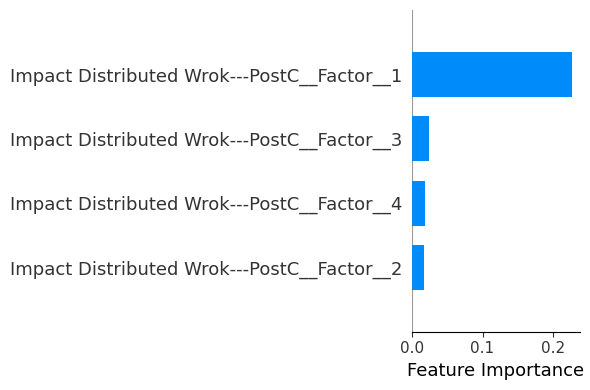

##########################################################################################

##########################################################################################
Space Types & Preferences---PREF

Shapes: (432, 4) (109, 4) (432,) (109,)

Scores 0.05536880239858618 58060711715754.336 0.14833717360884396



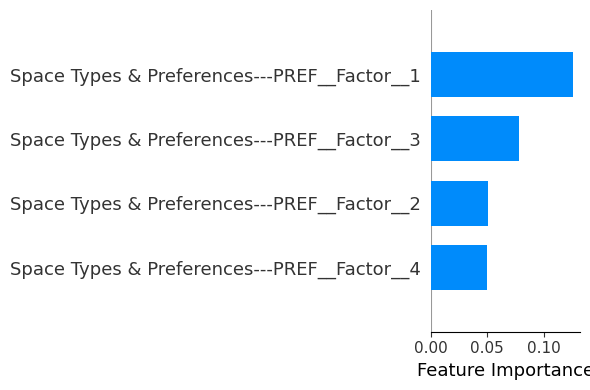

##########################################################################################

##########################################################################################
Workplace Features---PREF



divide by zero encountered in log
invalid value encountered in double_scalars


Shapes: (432, 4) (109, 4) (432,) (109,)

Scores 0.09797050363641445 106181963691529.67 0.27622430343187226



FactorAnalysis did not converge. You might want to increase the number of iterations.


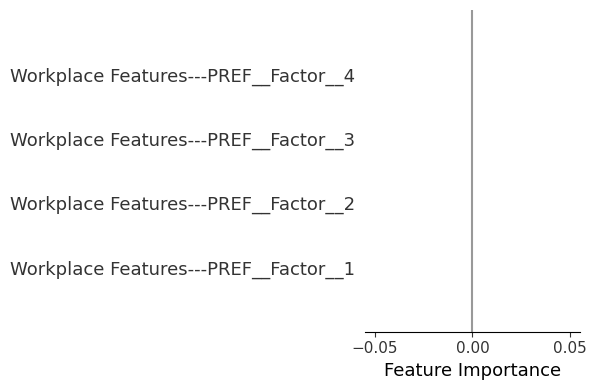

##########################################################################################



In [73]:
result_dict = dict.fromkeys(final_select_vars_cat)

supress_print = True

def model(x_train, x_test, y_train, y_test, plot_size=(6, 4), max_display=10):
    model = DecisionTreeRegressor(max_depth=10)

    model.fit(x_train, y_train)

    ### predict on test data

    y_pred = model.predict(x_test)

    ### evaluate the model

    from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error

    mse = mean_squared_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    print("Scores", mse, mape, mae, end="\n\n")   

    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(x_train)

    shap.summary_plot(shap_values, x_train, plot_type="bar", plot_size=plot_size, max_display=max_display, show=False)
    # plt.savefig('data_tool_demo/overall/shap_summary_plot_v1.png')
    plt.xlabel('Feature Importance')
    plt.show()

for var_cat in final_select_vars_cat:

    print("###"*30)
    print(var_cat, end="\n\n")
    
    cols = single_org_df_cols[single_org_df_cols['CategoryNew'] == var_cat]['Variable name'].values.tolist()
    
    num_factors = min(4, len(cols))

    subset_df_single_var_cat = df_single_org[cols].copy()

    for obj_col in subset_df_single_var_cat.dtypes[subset_df_single_var_cat.dtypes == object].index.values:
        subset_df_single_var_cat[obj_col] = subset_df_single_var_cat[obj_col].map(numeric_mapping_dict)


    subset_df_single_var_cat.fillna(-100000, inplace=True)

    scaler = StandardScaler()
    subset_df_scaled = scaler.fit_transform(subset_df_single_var_cat)
    
    fa = FactorAnalysis(n_components=num_factors, max_iter=5000)
    subset_df_factor = fa.fit_transform(subset_df_scaled)

    factor_col_names = [f"{var_cat}__Factor__{i}" for i in range(1, num_factors+1)]
    factor_df = pd.DataFrame(
        subset_df_factor,
        columns = factor_col_names
    )

    loadings = fa.components_.T  # Transpose so that variables are rows
    # Create a DataFrame for easier interpretation
    loadings_df = pd.DataFrame(
        loadings, 
        index=subset_df_single_var_cat.columns, 
        columns=factor_col_names
    )
    # Identify significant loadings and sort
    threshold = 0.2  # Set your threshold
    significant_loadings = loadings_df[abs(loadings_df) > threshold].fillna(0)

    result_dict[var_cat] = {
        'factors': factor_df,
        'loadings': significant_loadings,
    }

    if not supress_print:
        print(significant_loadings, end="\n\n")


    tgt_y_df = df_single_org[~df_single_org['PREF_WFK_rate_home'].isna()]['PREF_WFK_rate_home'].reset_index(drop=True)
    not_na_idx = tgt_y_df.index
    x_train, x_test, y_train, y_test = train_test_split(factor_df.iloc[not_na_idx], tgt_y_df, test_size=0.2, random_state=42)
    print("Shapes:", x_train.shape, x_test.shape, y_train.shape, y_test.shape, end="\n\n")

    model(x_train, x_test, y_train, y_test)

    print("###"*30, end="\n\n")

    # break

Shapes: (432, 8) (109, 8) (432,) (109,)

Scores 0.023283720718270094 25823392358775.88 0.06172273190621817



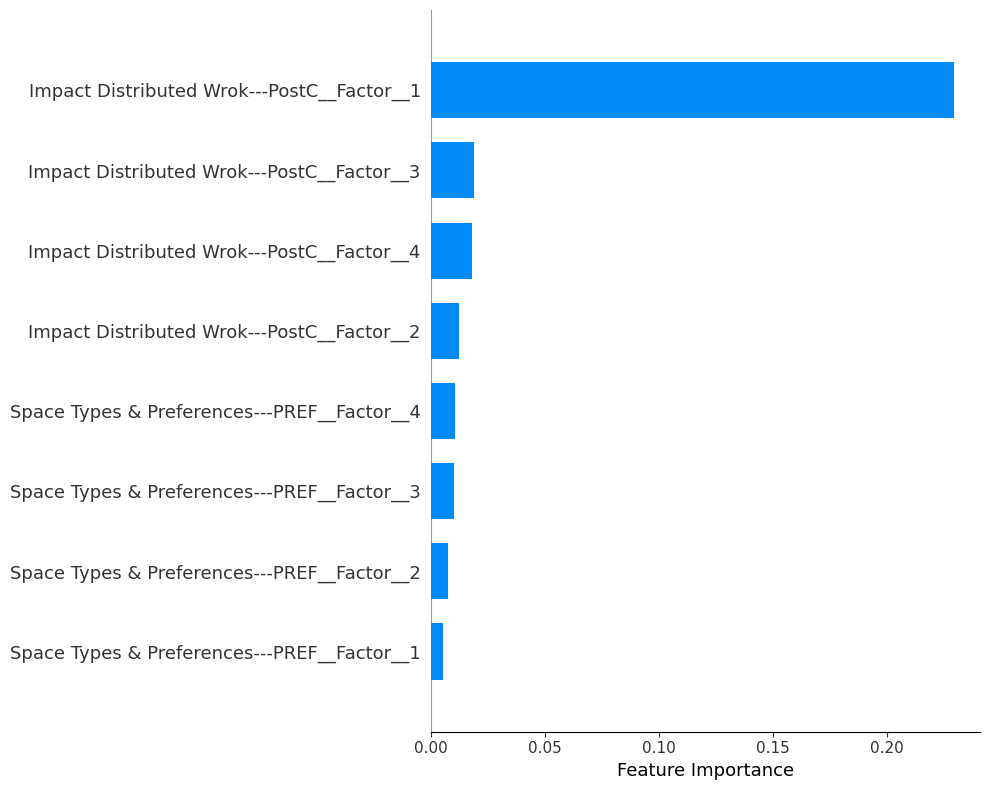

In [74]:
list_dfs_factors = [result_dict[i]['factors'] for i in result_dict.keys()]

final_df = pd.concat(
    list_dfs_factors + [df_single_org[single_org_df_cols[single_org_df_cols['CategoryNew'].isin(single_var_cats)]['Variable name'].values.tolist()]], 
    axis=1
).reset_index(drop=True)

### remove columns with zero variance
final_df = final_df.loc[:, final_df.apply(pd.Series.nunique) != 1]

tgt_y_df = df_single_org[~df_single_org['PREF_WFK_rate_home'].isna()]['PREF_WFK_rate_home'].reset_index(drop=True)
not_na_idx = tgt_y_df.index
x_train, x_test, y_train, y_test = train_test_split(final_df.iloc[not_na_idx], tgt_y_df, test_size=0.2, random_state=42)
print("Shapes:", x_train.shape, x_test.shape, y_train.shape, y_test.shape, end="\n\n")

model(x_train, x_test, y_train, y_test, (10, 8), 15)

In [75]:
result_dict['Impact Distributed Wrok---PostC']['loadings']

Impact Distributed Wrok---PostC__Factor__1  \
PostC_impact_shift_A_focus                                             -0.865072   
PostC_impact_shift_C_collab                                            -0.862782   
PostC_impact_shift_E_innovate                                          -0.914638   
PostC_impact_shift_G_teammeetings                                      -0.868694   
PostC_impact_shift_H_social                                            -0.822577   
PostC_impact_shift_I_managersconnect                                   -0.914222   
PostC_impact_shift_K_enjoy                                             -0.899509   

                                      Impact Distributed Wrok---PostC__Factor__2  \
PostC_impact_shift_A_focus                                              0.226360   
PostC_impact_shift_C_collab                                             0.000000   
PostC_impact_shift_E_innovate                                           0.000000   
PostC_impact_shift_G_teammeetings                                       0.000000   
PostC_impact_shift_H_social                                            -0.246528   
PostC_impact_shift_I_managersconnect                                   -0.253360   
PostC_impact_shift_K_enjoy                                              0.000000   

                                      Impact Distributed Wrok---PostC__Factor__3  \
PostC_impact_shift_A_focus                                              0.244131   
PostC_impact_shift_C_collab                                             0.000000   
PostC_impact_shift_E_innovate                                           0.000000   
PostC_impact_shift_G_teammeetings                                       0.000000   
PostC_impact_shift_H_social                                            -0.228252   
PostC_impact_shift_I_managersconnect                                    0.000000   
PostC_impact_shift_K_enjoy                                              0.000000   

                                      Impact Distributed Wrok---PostC__Factor__4  
PostC_impact_shift_A_focus                                                   0.0  
PostC_impact_shift_C_collab                                                  0.0  
PostC_impact_shift_E_innovate                                                0.0  
PostC_impact_shift_G_teammeetings                                            0.0  
PostC_impact_shift_H_social                                                  0.0  
PostC_impact_shift_I_managersconnect                                         0.0  
PostC_impact_shift_K_enjoy                                                   0.0

In [76]:
result_dict['Space Types & Preferences---PREF']['loadings']

Space Types & Preferences---PREF__Factor__1  \
PREF_space_A_focusedWk                                          -0.461435   
PREF_space_B_inperson_collab                                     0.000000   
PREF_space_C_videoconf                                          -0.293367   
PREF_space_D_impromptu                                          -0.630211   
PREF_space_F_accessible                                         -0.621285   

                              Space Types & Preferences---PREF__Factor__2  \
PREF_space_A_focusedWk                                           0.354650   
PREF_space_B_inperson_collab                                     0.533777   
PREF_space_C_videoconf                                           0.365896   
PREF_space_D_impromptu                                          -0.258457   
PREF_space_F_accessible                                         -0.201097   

                              Space Types & Preferences---PREF__Factor__3  \
PREF_space_A_focusedWk                                           0.217965   
PREF_space_B_inperson_collab                                     0.000000   
PREF_space_C_videoconf                                          -0.327333   
PREF_space_D_impromptu                                           0.000000   
PREF_space_F_accessible                                         -0.221550   

                              Space Types & Preferences---PREF__Factor__4  
PREF_space_A_focusedWk                                                0.0  
PREF_space_B_inperson_collab                                          0.0  
PREF_space_C_videoconf                                                0.0  
PREF_space_D_impromptu                                                0.0  
PREF_space_F_accessible                                               0.0

# Single Org Analysis - Org 1

In [94]:
df_single_org = df_og[df_og['DEMO_Org'] == "Org 1"].copy().reset_index(drop=True)
df_single_org.sum()[df_single_org.sum() == 0].shape

The default value of numeric_only in DataFrame.sum is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.


(66,)

In [95]:
df_single_org['PREF_WFK_rate_home'].isna().sum()

5

In [96]:
df_single_org.dropna(axis=1, inplace=True, thresh=df_single_org.shape[0]*0.2)
print(df_single_org.shape)

single_org_df_cols = df_columns[df_columns['Variable name'].isin(df_single_org.columns)].copy()
var_counts = single_org_df_cols.groupby('CategoryNew')['ct'].count().reset_index()
print(var_counts)

target_var = ['Mobility: Days remote / in-office---PREF']
single_var_cats = var_counts[(var_counts['ct'] == 1) & (~var_counts['CategoryNew'].isin(target_var))]['CategoryNew'].values.tolist()
exclude_vars_cat = single_var_cats + target_var + ['DEMO---DEMO']

final_select_vars_cat = [i for i in var_counts.CategoryNew.values if i not in exclude_vars_cat]
final_select_vars_cat, single_var_cats

(85, 126)
                                    CategoryNew  ct
0                                   DEMO---DEMO   3
1              Environmental Preferences---PREF  14
2               Impact Distributed Wrok---PostC  12
3                     Influental Factors---DEMO   1
4                       Interactive Work---OBSV   6
5      Mobility: Days remote / in-office---OBSV   8
6      Mobility: Days remote / in-office---PREF   1
7              Space Types & Preferences---OBSV   8
8              Space Types & Preferences---PREF   7
9             Workplace Characteristics---SATSF  10
10               Workplace Characteristics---WP  10
11                    Workplace Features---PREF  22
12                   Workplace Features---SATSF   5
13   Workplace Satisfactoin / Perfomance---OBSV  12
14  Workplace Satisfactoin / Perfomance---SATSF   6
15                             Workstyle---OBSV   1


(['Environmental Preferences---PREF',
  'Impact Distributed Wrok---PostC',
  'Interactive Work---OBSV',
  'Mobility: Days remote / in-office---OBSV',
  'Space Types & Preferences---OBSV',
  'Space Types & Preferences---PREF',
  'Workplace Characteristics---SATSF',
  'Workplace Characteristics---WP',
  'Workplace Features---PREF',
  'Workplace Features---SATSF',
  'Workplace Satisfactoin / Perfomance---OBSV',
  'Workplace Satisfactoin / Perfomance---SATSF'],
 ['Influental Factors---DEMO', 'Workstyle---OBSV'])

##########################################################################################
Environmental Preferences---PREF

Shapes: (64, 4) (16, 4) (64,) (16,)

Scores 0.18944444444444447 619244948763443.5 0.3416666666666667



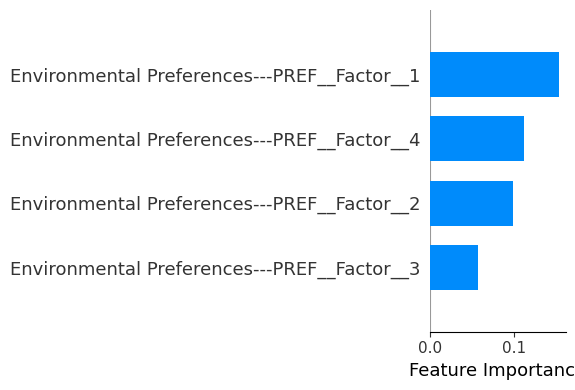

##########################################################################################

##########################################################################################
Impact Distributed Wrok---PostC

Shapes: (64, 4) (16, 4) (64,) (16,)

Scores 0.2725 562949953421312.2 0.3875



##########################################################################################

##########################################################################################
Interactive Work---OBSV

Shapes: (64, 4) (16, 4) (64,) (16,)

Scores 0.1364727508650519 506654958079181.06 0.2665441176470588



##########################################################################################

##########################################################################################
Mobility: Days remote / in-office---OBSV

Shapes: (64, 4) (16, 4) (64,) (16,)

Scores 0.15948979591836734 281474976710656.44 0.3392857142857143



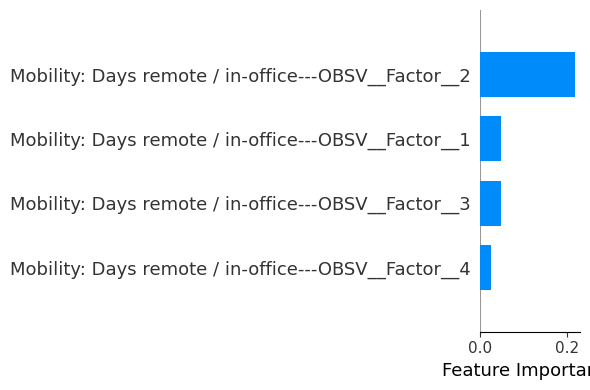

##########################################################################################

##########################################################################################
Space Types & Preferences---OBSV

Shapes: (64, 4) (16, 4) (64,) (16,)

Scores 0.15364152892561983 281474976710656.3 0.27443181818181817



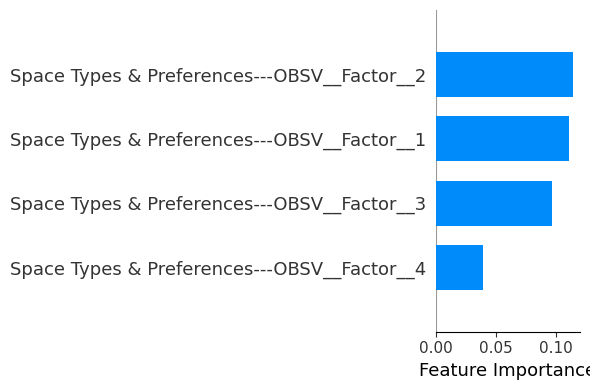

##########################################################################################

##########################################################################################
Space Types & Preferences---PREF

Shapes: (64, 4) (16, 4) (64,) (16,)

Scores 0.393125 562949953421312.4 0.53125



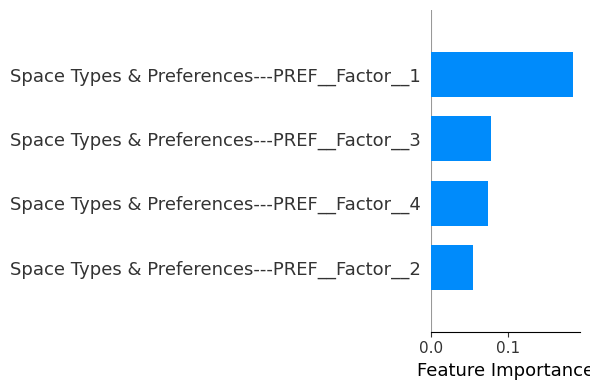

##########################################################################################

##########################################################################################
Workplace Characteristics---SATSF

Shapes: (64, 4) (16, 4) (64,) (16,)

Scores 0.1827933673469388 506654958079181.06 0.34375



##########################################################################################

##########################################################################################
Workplace Characteristics---WP

Shapes: (64, 4) (16, 4) (64,) (16,)

Scores 0.1540625 450359962737049.9 0.29375



##########################################################################################

##########################################################################################
Workplace Features---PREF

Shapes: (64, 4) (16, 4) (64,) (16,)

Scores 0.1841 562949953421312.2 0.3225



##########################################################################################

##########################################################################################
Workplace Features---SATSF

Shapes: (64, 4) (16, 4) (64,) (16,)

Scores 0.19420625 675539944105574.8 0.334375



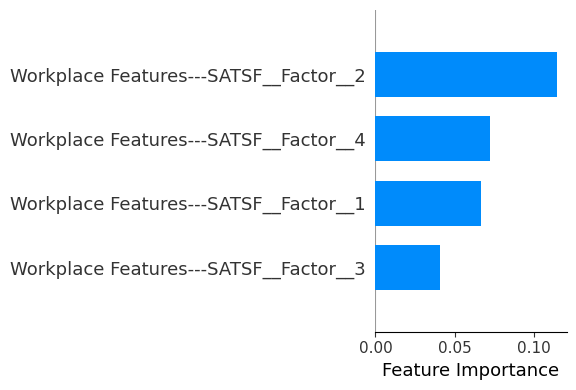

##########################################################################################

##########################################################################################
Workplace Satisfactoin / Perfomance---OBSV

Shapes: (64, 4) (16, 4) (64,) (16,)

Scores 0.15180555555555558 225179981368525.12 0.3125



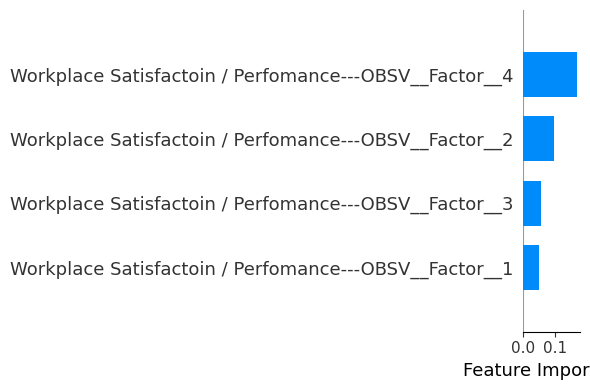

##########################################################################################

##########################################################################################
Workplace Satisfactoin / Perfomance---SATSF

Shapes: (64, 4) (16, 4) (64,) (16,)

Scores 0.21491879000120756 731834939447705.9 0.3243131868131868



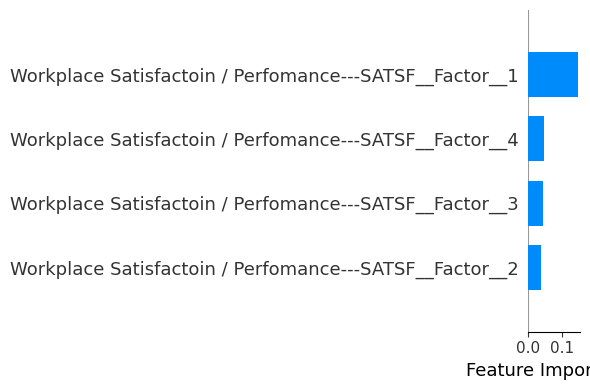

##########################################################################################



In [97]:
result_dict = dict.fromkeys(final_select_vars_cat)

supress_print = True

def model(x_train, x_test, y_train, y_test, plot_size=(6, 4), max_display=10):
    model = DecisionTreeRegressor(max_depth=10)

    model.fit(x_train, y_train)

    ### predict on test data

    y_pred = model.predict(x_test)

    ### evaluate the model

    from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error

    mse = mean_squared_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    print("Scores", mse, mape, mae, end="\n\n")   

    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(x_train)

    shap.summary_plot(shap_values, x_train, plot_type="bar", plot_size=plot_size, max_display=max_display, show=False)
    # plt.savefig('data_tool_demo/overall/shap_summary_plot_v1.png')
    plt.xlabel('Feature Importance')
    plt.show()

for var_cat in final_select_vars_cat:

    print("###"*30)
    print(var_cat, end="\n\n")
    
    cols = single_org_df_cols[single_org_df_cols['CategoryNew'] == var_cat]['Variable name'].values.tolist()
    
    num_factors = min(4, len(cols))

    subset_df_single_var_cat = df_single_org[cols].copy()

    for obj_col in subset_df_single_var_cat.dtypes[subset_df_single_var_cat.dtypes == object].index.values:
        subset_df_single_var_cat[obj_col] = subset_df_single_var_cat[obj_col].map(numeric_mapping_dict)


    subset_df_single_var_cat.fillna(-100000, inplace=True)

    scaler = StandardScaler()
    subset_df_scaled = scaler.fit_transform(subset_df_single_var_cat)
    
    fa = FactorAnalysis(n_components=num_factors, max_iter=5000)
    subset_df_factor = fa.fit_transform(subset_df_scaled)

    factor_col_names = [f"{var_cat}__Factor__{i}" for i in range(1, num_factors+1)]
    factor_df = pd.DataFrame(
        subset_df_factor,
        columns = factor_col_names
    )

    loadings = fa.components_.T  # Transpose so that variables are rows
    # Create a DataFrame for easier interpretation
    loadings_df = pd.DataFrame(
        loadings, 
        index=subset_df_single_var_cat.columns, 
        columns=factor_col_names
    )
    # Identify significant loadings and sort
    threshold = 0.2  # Set your threshold
    significant_loadings = loadings_df[abs(loadings_df) > threshold].fillna(0)

    result_dict[var_cat] = {
        'factors': factor_df,
        'loadings': significant_loadings,
    }

    if not supress_print:
        print(significant_loadings, end="\n\n")


    tgt_y_df = df_single_org[~df_single_org['PREF_WFK_rate_home'].isna()]['PREF_WFK_rate_home'].reset_index(drop=True)
    not_na_idx = tgt_y_df.index
    x_train, x_test, y_train, y_test = train_test_split(factor_df.iloc[not_na_idx], tgt_y_df, test_size=0.2, random_state=42)
    print("Shapes:", x_train.shape, x_test.shape, y_train.shape, y_test.shape, end="\n\n")

    model(x_train, x_test, y_train, y_test)

    print("###"*30, end="\n\n")

    # break

Shapes: (64, 50) (16, 50) (64,) (16,)

Scores 0.11000000000000001 281474976710656.4 0.30000000000000004



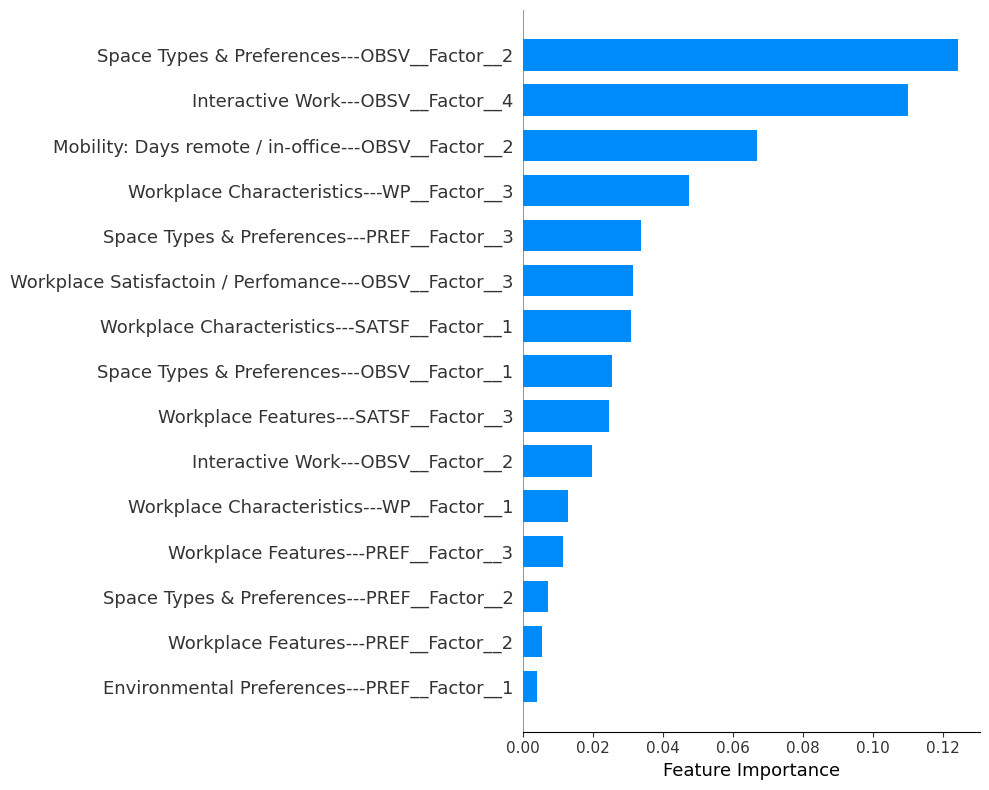

In [98]:
list_dfs_factors = [result_dict[i]['factors'] for i in result_dict.keys()]

final_df = pd.concat(
    list_dfs_factors + [df_single_org[single_org_df_cols[single_org_df_cols['CategoryNew'].isin(single_var_cats)]['Variable name'].values.tolist()]], 
    axis=1
).reset_index(drop=True)

### remove columns with zero variance
final_df = final_df.loc[:, final_df.apply(pd.Series.nunique) != 1]

tgt_y_df = df_single_org[~df_single_org['PREF_WFK_rate_home'].isna()]['PREF_WFK_rate_home'].reset_index(drop=True)
not_na_idx = tgt_y_df.index
x_train, x_test, y_train, y_test = train_test_split(final_df.iloc[not_na_idx], tgt_y_df, test_size=0.2, random_state=42)
print("Shapes:", x_train.shape, x_test.shape, y_train.shape, y_test.shape, end="\n\n")

model(x_train, x_test, y_train, y_test, (10, 8), 15)

In [99]:
result_dict['Space Types & Preferences---OBSV']['loadings']

Space Types & Preferences---OBSV__Factor__1  \
OBSV_PreC_space_A_InformalMtg                                          0.000000   
OBSV_PreC_space_B_FormalMtg                                            0.000000   
OBSV_PreC_wiOffice_A_desk                                             -0.959796   
OBSV_PreC_wiOffice_B_otherdeck                                         0.258378   
OBSV_PreC_wiOffice_C_meetingrm                                         0.282226   
OBSV_PreC_wiOffice_D_lobby                                             0.000000   
OBSV_PreC_wiOffice_E_speicaltyarea                                     0.660653   
OBSV_PreC_wiOffice_F_other                                             0.000000   

                                    Space Types & Preferences---OBSV__Factor__2  \
OBSV_PreC_space_A_InformalMtg                                          0.000000   
OBSV_PreC_space_B_FormalMtg                                            0.000000   
OBSV_PreC_wiOffice_A_desk                                              0.000000   
OBSV_PreC_wiOffice_B_otherdeck                                         0.000000   
OBSV_PreC_wiOffice_C_meetingrm                                        -0.598463   
OBSV_PreC_wiOffice_D_lobby                                            -0.323457   
OBSV_PreC_wiOffice_E_speicaltyarea                                     0.683290   
OBSV_PreC_wiOffice_F_other                                            -0.243476   

                                    Space Types & Preferences---OBSV__Factor__3  \
OBSV_PreC_space_A_InformalMtg                                          0.000000   
OBSV_PreC_space_B_FormalMtg                                            0.000000   
OBSV_PreC_wiOffice_A_desk                                              0.000000   
OBSV_PreC_wiOffice_B_otherdeck                                         0.000000   
OBSV_PreC_wiOffice_C_meetingrm                                        -0.524023   
OBSV_PreC_wiOffice_D_lobby                                             0.772318   
OBSV_PreC_wiOffice_E_speicaltyarea                                     0.000000   
OBSV_PreC_wiOffice_F_other                                             0.000000   

                                    Space Types & Preferences---OBSV__Factor__4  
OBSV_PreC_space_A_InformalMtg                                          0.000000  
OBSV_PreC_space_B_FormalMtg                                            0.000000  
OBSV_PreC_wiOffice_A_desk                                              0.000000  
OBSV_PreC_wiOffice_B_otherdeck                                         0.347796  
OBSV_PreC_wiOffice_C_meetingrm                                        -0.384459  
OBSV_PreC_wiOffice_D_lobby                                            -0.341939  
OBSV_PreC_wiOffice_E_speicaltyarea                                     0.000000  
OBSV_PreC_wiOffice_F_other                                             0.354693

In [100]:
result_dict['Interactive Work---OBSV']['loadings']

Interactive Work---OBSV__Factor__1  \
OBSV_PreC_meetingsize0ffice_A_1                             -0.291645   
OBSV_PreC_meetingsize0ffice_B_2n3                           -0.629919   
OBSV_PreC_meetingsize0ffice_C_4n9                           -0.563384   
OBSV_PreC_meeting_A_inperson                                 0.000000   
OBSV_PreC_meeting_B_hyrbid                                  -0.648270   
OBSV_PreC_meeting_C_remote                                  -0.433434   

                                   Interactive Work---OBSV__Factor__2  \
OBSV_PreC_meetingsize0ffice_A_1                              0.367197   
OBSV_PreC_meetingsize0ffice_B_2n3                           -0.365578   
OBSV_PreC_meetingsize0ffice_C_4n9                            0.000000   
OBSV_PreC_meeting_A_inperson                                 0.354719   
OBSV_PreC_meeting_B_hyrbid                                   0.000000   
OBSV_PreC_meeting_C_remote                                   0.000000   

                                   Interactive Work---OBSV__Factor__3  \
OBSV_PreC_meetingsize0ffice_A_1                              0.311934   
OBSV_PreC_meetingsize0ffice_B_2n3                            0.000000   
OBSV_PreC_meetingsize0ffice_C_4n9                            0.247480   
OBSV_PreC_meeting_A_inperson                                -0.427444   
OBSV_PreC_meeting_B_hyrbid                                  -0.265497   
OBSV_PreC_meeting_C_remote                                   0.000000   

                                   Interactive Work---OBSV__Factor__4  
OBSV_PreC_meetingsize0ffice_A_1                              0.000000  
OBSV_PreC_meetingsize0ffice_B_2n3                            0.000000  
OBSV_PreC_meetingsize0ffice_C_4n9                            0.000000  
OBSV_PreC_meeting_A_inperson                                 0.000000  
OBSV_PreC_meeting_B_hyrbid                                   0.000000  
OBSV_PreC_meeting_C_remote                                  -0.283395

In [101]:
result_dict['Mobility: Days remote / in-office---OBSV']['loadings']

Mobility: Days remote / in-office---OBSV__Factor__1  \
OBSV_PreC_WFH_Days_Wk                                                       0.000000     
OBSV_PreC_Location_A_primryoffice                                          -0.279101     
OBSV_PreC_Location_B_officeother                                           -0.756477     
OBSV_PreC_Location_C_client                                                -0.650354     
OBSV_PreC_Location_D_WFH                                                   -0.663184     
OBSV_PreC_Location_E_publicspace                                           -0.879234     
OBSV_PreC_Location_F_transit                                               -0.814750     
OBSV_PreC_Location_G_other                                                 -0.595799     

                                   Mobility: Days remote / in-office---OBSV__Factor__2  \
OBSV_PreC_WFH_Days_Wk                                                       0.000000     
OBSV_PreC_Location_A_primryoffice                                          -0.382640     
OBSV_PreC_Location_B_officeother                                            0.000000     
OBSV_PreC_Location_C_client                                                 0.425681     
OBSV_PreC_Location_D_WFH                                                    0.000000     
OBSV_PreC_Location_E_publicspace                                           -0.254313     
OBSV_PreC_Location_F_transit                                                0.229728     
OBSV_PreC_Location_G_other                                                 -0.279378     

                                   Mobility: Days remote / in-office---OBSV__Factor__3  \
OBSV_PreC_WFH_Days_Wk                                                       0.000000     
OBSV_PreC_Location_A_primryoffice                                          -0.538501     
OBSV_PreC_Location_B_officeother                                            0.000000     
OBSV_PreC_Location_C_client                                                -0.238282     
OBSV_PreC_Location_D_WFH                                                    0.348574     
OBSV_PreC_Location_E_publicspace                                            0.000000     
OBSV_PreC_Location_F_transit                                                0.000000     
OBSV_PreC_Location_G_other                                                  0.000000     

                                   Mobility: Days remote / in-office---OBSV__Factor__4  
OBSV_PreC_WFH_Days_Wk                                                       0.000000    
OBSV_PreC_Location_A_primryoffice                                           0.000000    
OBSV_PreC_Location_B_officeother                                           -0.221760    
OBSV_PreC_Location_C_client                                                 0.000000    
OBSV_PreC_Location_D_WFH                                                    0.310917    
OBSV_PreC_Location_E_publicspace                                            0.000000    
OBSV_PreC_Location_F_transit                                                0.225316    
OBSV_PreC_Location_G_other                                                  0.000000

In [102]:
result_dict['Workplace Characteristics---WP']['loadings']

Workplace Characteristics---WP__Factor__1  \
WP_Featr_office_A_community                                            -1.0   
WP_Featr_office_C_pride                                                -1.0   
WP_Featr_office_D_expressme                                            -1.0   
WP_Featr_office_E_control                                              -1.0   
WP_Featr_office_F_wellbeing                                            -1.0   
WP_Featr_office_G_myfamily                                             -1.0   
WP_Featr_office_H_customers                                            -1.0   
WP_Featr_office_I_oegculture                                           -1.0   
WP_Featr_office_J_knowledgeshare                                       -1.0   
WP_Featr_office_K_planet                                               -1.0   

                                  Workplace Characteristics---WP__Factor__2  \
WP_Featr_office_A_community                                             0.0   
WP_Featr_office_C_pride                                                 0.0   
WP_Featr_office_D_expressme                                             0.0   
WP_Featr_office_E_control                                               0.0   
WP_Featr_office_F_wellbeing                                             0.0   
WP_Featr_office_G_myfamily                                              0.0   
WP_Featr_office_H_customers                                             0.0   
WP_Featr_office_I_oegculture                                            0.0   
WP_Featr_office_J_knowledgeshare                                        0.0   
WP_Featr_office_K_planet                                                0.0   

                                  Workplace Characteristics---WP__Factor__3  \
WP_Featr_office_A_community                                             0.0   
WP_Featr_office_C_pride                                                 0.0   
WP_Featr_office_D_expressme                                             0.0   
WP_Featr_office_E_control                                               0.0   
WP_Featr_office_F_wellbeing                                             0.0   
WP_Featr_office_G_myfamily                                              0.0   
WP_Featr_office_H_customers                                             0.0   
WP_Featr_office_I_oegculture                                            0.0   
WP_Featr_office_J_knowledgeshare                                        0.0   
WP_Featr_office_K_planet                                                0.0   

                                  Workplace Characteristics---WP__Factor__4  
WP_Featr_office_A_community                                             0.0  
WP_Featr_office_C_pride                                                 0.0  
WP_Featr_office_D_expressme                                             0.0  
WP_Featr_office_E_control                                               0.0  
WP_Featr_office_F_wellbeing                                             0.0  
WP_Featr_office_G_myfamily                                              0.0  
WP_Featr_office_H_customers                                             0.0  
WP_Featr_office_I_oegculture                                            0.0  
WP_Featr_office_J_knowledgeshare                                        0.0  
WP_Featr_office_K_planet                                                0.0

In [104]:
result_dict['Workplace Satisfactoin / Perfomance---OBSV']['loadings']

Workplace Satisfactoin / Perfomance---OBSV__Factor__1  \
OBSV_PreC_5A_lost_layout                                               -0.716301       
OBSV_PreC_5B_lost_looking                                              -0.467960       
OBSV_PreC_5C_lost_perstech                                             -0.589012       
OBSV_PreC_5D_lost_roomtech                                             -0.675243       
OBSV_PreC_5E_lost_visitors                                             -0.659590       
OBSV_PreC_5F_lost_noise                                                -0.531033       
OBSV_PreC_5G_lost_comms                                                -0.565991       
OBSV_PreC_5H_lost_ergo                                                 -0.871093       
OBSV_PreC_5I_lost_temp                                                 -0.857932       
OBSV_PreC_5J_lost_odor                                                 -0.932483       
OBSV_PreC_5K_lost_natlight                                             -0.913356       
OBSV_PreC_5L_lost_indoorlight                                          -0.846151       

                               Workplace Satisfactoin / Perfomance---OBSV__Factor__2  \
OBSV_PreC_5A_lost_layout                                                0.000000       
OBSV_PreC_5B_lost_looking                                               0.000000       
OBSV_PreC_5C_lost_perstech                                              0.000000       
OBSV_PreC_5D_lost_roomtech                                              0.000000       
OBSV_PreC_5E_lost_visitors                                              0.678904       
OBSV_PreC_5F_lost_noise                                                 0.000000       
OBSV_PreC_5G_lost_comms                                                 0.319125       
OBSV_PreC_5H_lost_ergo                                                  0.000000       
OBSV_PreC_5I_lost_temp                                                  0.000000       
OBSV_PreC_5J_lost_odor                                                  0.000000       
OBSV_PreC_5K_lost_natlight                                              0.000000       
OBSV_PreC_5L_lost_indoorlight                                           0.000000       

                               Workplace Satisfactoin / Perfomance---OBSV__Factor__3  \
OBSV_PreC_5A_lost_layout                                                0.000000       
OBSV_PreC_5B_lost_looking                                               0.000000       
OBSV_PreC_5C_lost_perstech                                              0.000000       
OBSV_PreC_5D_lost_roomtech                                              0.366913       
OBSV_PreC_5E_lost_visitors                                              0.000000       
OBSV_PreC_5F_lost_noise                                                -0.316171       
OBSV_PreC_5G_lost_comms                                                 0.000000       
OBSV_PreC_5H_lost_ergo                                                  0.000000       
OBSV_PreC_5I_lost_temp                                                 -0.204019       
OBSV_PreC_5J_lost_odor                                                  0.232531       
OBSV_PreC_5K_lost_natlight                                              0.000000       
OBSV_PreC_5L_lost_indoorlight                                          -0.307061       

                               Workplace Satisfactoin / Perfomance---OBSV__Factor__4  
OBSV_PreC_5A_lost_layout                                               -0.231369      
OBSV_PreC_5B_lost_looking                                               0.000000      
OBSV_PreC_5C_lost_perstech                                              0.238531      
OBSV_PreC_5D_lost_roomtech                                              0.257919      
OBSV_PreC_5E_lost_visitors                                              0.000000      
OBSV_PreC_5F_lost_noise                                                 0.

# Single Org Analysis - Org 2 (Composite Target Var)

In [122]:
df_single_org = df_og[df_og['DEMO_Org'] == "Org 2"].copy().reset_index(drop=True)
df_single_org.sum()[df_single_org.sum() == 0].shape

(121,)

In [123]:
proxy_pref_vars = [
    'PostC_impact_shift_A_focus',
    'PostC_impact_shift_B_productive',
    'PostC_impact_shift_C_collab',
    'PostC_impact_shift_D_videoconf',
    'PostC_impact_shift_E_innovate',
    'PostC_impact_shift_F_colleagueaccess',
    'PostC_impact_shift_G_teammeetings',
    'PostC_impact_shift_H_social',
    'PostC_impact_shift_I_managersconnect',
    'PostC_impact_shift_J_client',
    'PostC_impact_shift_K_enjoy'
]

df_single_org['UPDATED_TARGET_VAR'] = df_single_org[proxy_pref_vars].mean(axis=1)
target_var2 = 'UPDATED_TARGET_VAR'


In [124]:
df_single_org.dropna(axis=1, inplace=True, thresh=df_single_org.shape[0]*0.3)
print(df_single_org.shape)

single_org_df_cols = df_columns[df_columns['Variable name'].isin(df_single_org.columns)].copy()
var_counts = single_org_df_cols.groupby('CategoryNew')['ct'].count().reset_index()
print(var_counts)

target_var = ['Mobility: Days remote / in-office---PREF', 'Impact Distributed Wrok---PostC']
single_var_cats = var_counts[(var_counts['ct'] == 1) & (~var_counts['CategoryNew'].isin(target_var))]['CategoryNew'].values.tolist()
exclude_vars_cat = single_var_cats + target_var + ['DEMO---DEMO']

final_select_vars_cat = [i for i in var_counts.CategoryNew.values if i not in exclude_vars_cat]
final_select_vars_cat, single_var_cats

(130, 64)
                                 CategoryNew  ct
0                                DEMO---DEMO   2
1            Impact Distributed Wrok---PostC  10
2                 Influental Factors---DECSN  12
3                    Interactive Work---OBSV   7
4   Mobility: Days remote / in-office---OBSV   4
5           Space Types & Preferences---OBSV   3
6           Space Types & Preferences---PREF   2
7          Workplace Characteristics---SATSF   7
8             Workplace Characteristics---WP   7
9                  Workplace Features---PREF   8
10                          Workstyle---OBSV   1


(['Influental Factors---DECSN',
  'Interactive Work---OBSV',
  'Mobility: Days remote / in-office---OBSV',
  'Space Types & Preferences---OBSV',
  'Space Types & Preferences---PREF',
  'Workplace Characteristics---SATSF',
  'Workplace Characteristics---WP',
  'Workplace Features---PREF'],
 ['Workstyle---OBSV'])

##########################################################################################
Influental Factors---DECSN

Shapes: (104, 4) (26, 4) (104,) (26,)

Scores 1.0167254273504274 86607685141740.75 0.839102564102564



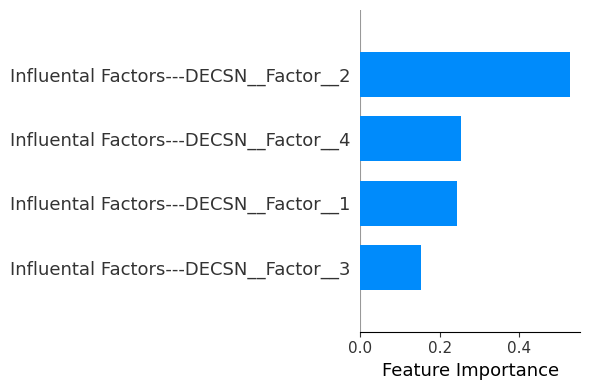

##########################################################################################

##########################################################################################
Interactive Work---OBSV

Shapes: (104, 4) (26, 4) (104,) (26,)

Scores 2.892721984805319 744826092218967.1 1.4014957264957266



##########################################################################################

##########################################################################################
Mobility: Days remote / in-office---OBSV

Shapes: (104, 4) (26, 4) (104,) (26,)

Scores 0.7292484829651728 536967647878790.3 0.6684615384615386



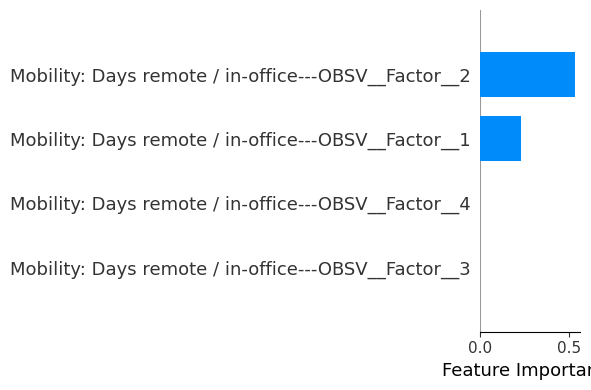

##########################################################################################

##########################################################################################
Space Types & Preferences---OBSV

Shapes: (104, 3) (26, 3) (104,) (26,)

Scores 1.6576286898356847 912769690363385.5 1.0130434782608697



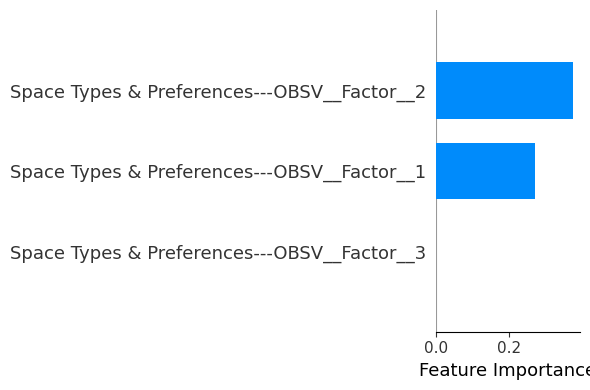

##########################################################################################

##########################################################################################
Space Types & Preferences---PREF

Shapes: (104, 2) (26, 2) (104,) (26,)

Scores 1.5065404192782528 991484779502643.5 0.9194401709401709



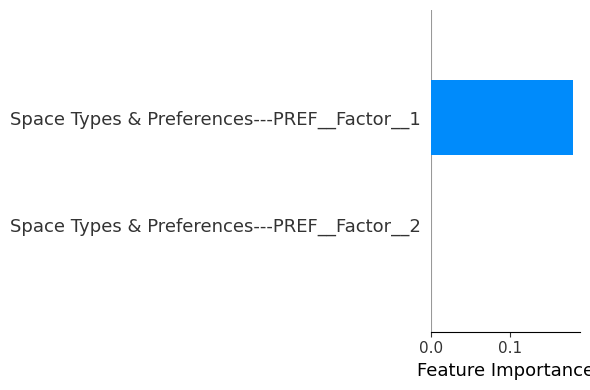

##########################################################################################

##########################################################################################
Workplace Characteristics---SATSF

Shapes: (104, 4) (26, 4) (104,) (26,)

Scores 1.2931299058084773 824010261491415.4 0.8499999999999999



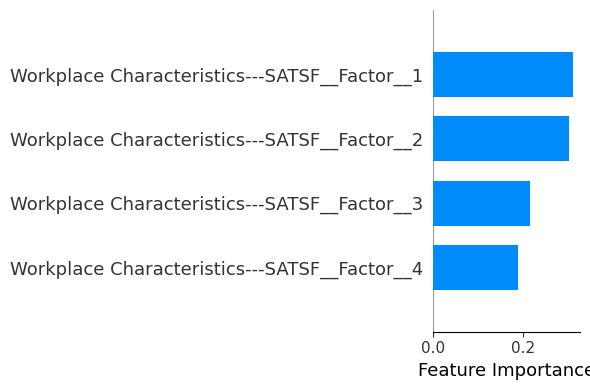

##########################################################################################

##########################################################################################
Workplace Characteristics---WP

Shapes: (104, 4) (26, 4) (104,) (26,)

Scores 2.679292122498038 822773008846533.9 1.3242101648351647



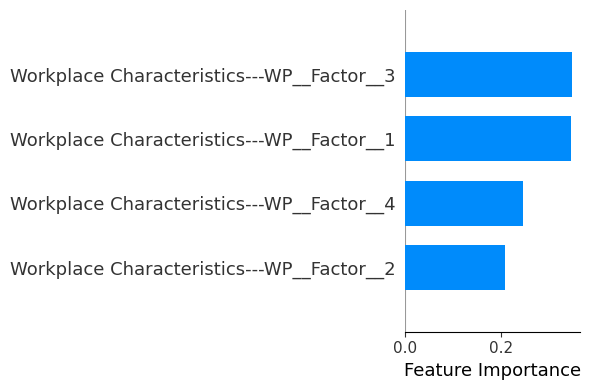

##########################################################################################

##########################################################################################
Workplace Features---PREF

Shapes: (104, 4) (26, 4) (104,) (26,)

Scores 1.7210390491452994 1065274527243406.1 1.0064102564102564



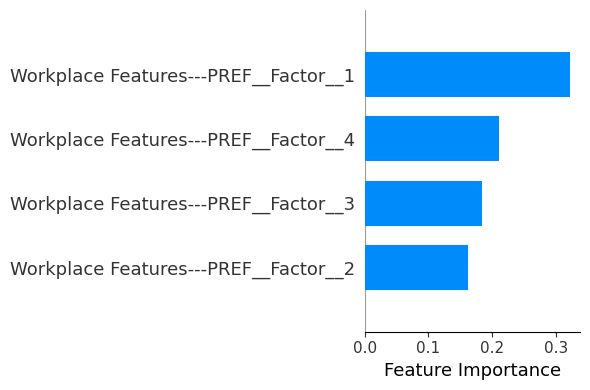

##########################################################################################



In [125]:
result_dict = dict.fromkeys(final_select_vars_cat)

supress_print = True

def model(x_train, x_test, y_train, y_test, plot_size=(6, 4), max_display=10):
    model = DecisionTreeRegressor(max_depth=10)

    model.fit(x_train, y_train)

    ### predict on test data

    y_pred = model.predict(x_test)

    ### evaluate the model

    from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error

    mse = mean_squared_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    print("Scores", mse, mape, mae, end="\n\n")   

    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(x_train)

    shap.summary_plot(shap_values, x_train, plot_type="bar", plot_size=plot_size, max_display=max_display, show=False)
    # plt.savefig('data_tool_demo/overall/shap_summary_plot_v1.png')
    plt.xlabel('Feature Importance')
    plt.show()

for var_cat in final_select_vars_cat:

    print("###"*30)
    print(var_cat, end="\n\n")
    
    cols = single_org_df_cols[single_org_df_cols['CategoryNew'] == var_cat]['Variable name'].values.tolist()
    
    num_factors = min(4, len(cols))

    subset_df_single_var_cat = df_single_org[cols].copy()

    for obj_col in subset_df_single_var_cat.dtypes[subset_df_single_var_cat.dtypes == object].index.values:
        subset_df_single_var_cat[obj_col] = subset_df_single_var_cat[obj_col].map(numeric_mapping_dict)


    subset_df_single_var_cat.fillna(-100000, inplace=True)

    scaler = StandardScaler()
    subset_df_scaled = scaler.fit_transform(subset_df_single_var_cat)
    
    fa = FactorAnalysis(n_components=num_factors, max_iter=5000)
    subset_df_factor = fa.fit_transform(subset_df_scaled)

    factor_col_names = [f"{var_cat}__Factor__{i}" for i in range(1, num_factors+1)]
    factor_df = pd.DataFrame(
        subset_df_factor,
        columns = factor_col_names
    )

    loadings = fa.components_.T  # Transpose so that variables are rows
    # Create a DataFrame for easier interpretation
    loadings_df = pd.DataFrame(
        loadings, 
        index=subset_df_single_var_cat.columns, 
        columns=factor_col_names
    )
    # Identify significant loadings and sort
    threshold = 0.2  # Set your threshold
    significant_loadings = loadings_df[abs(loadings_df) > threshold].fillna(0)

    result_dict[var_cat] = {
        'factors': factor_df,
        'loadings': significant_loadings,
    }

    if not supress_print:
        print(significant_loadings, end="\n\n")


    tgt_y_df = df_single_org[~df_single_org[target_var2].isna()][target_var2].reset_index(drop=True)
    not_na_idx = tgt_y_df.index
    x_train, x_test, y_train, y_test = train_test_split(factor_df.iloc[not_na_idx], tgt_y_df, test_size=0.2, random_state=42)
    print("Shapes:", x_train.shape, x_test.shape, y_train.shape, y_test.shape, end="\n\n")

    model(x_train, x_test, y_train, y_test)

    print("###"*30, end="\n\n")

    # break

Shapes: (104, 26) (26, 26) (104,) (26,)

Scores 1.1775594284188033 502324573822094.25 0.90625



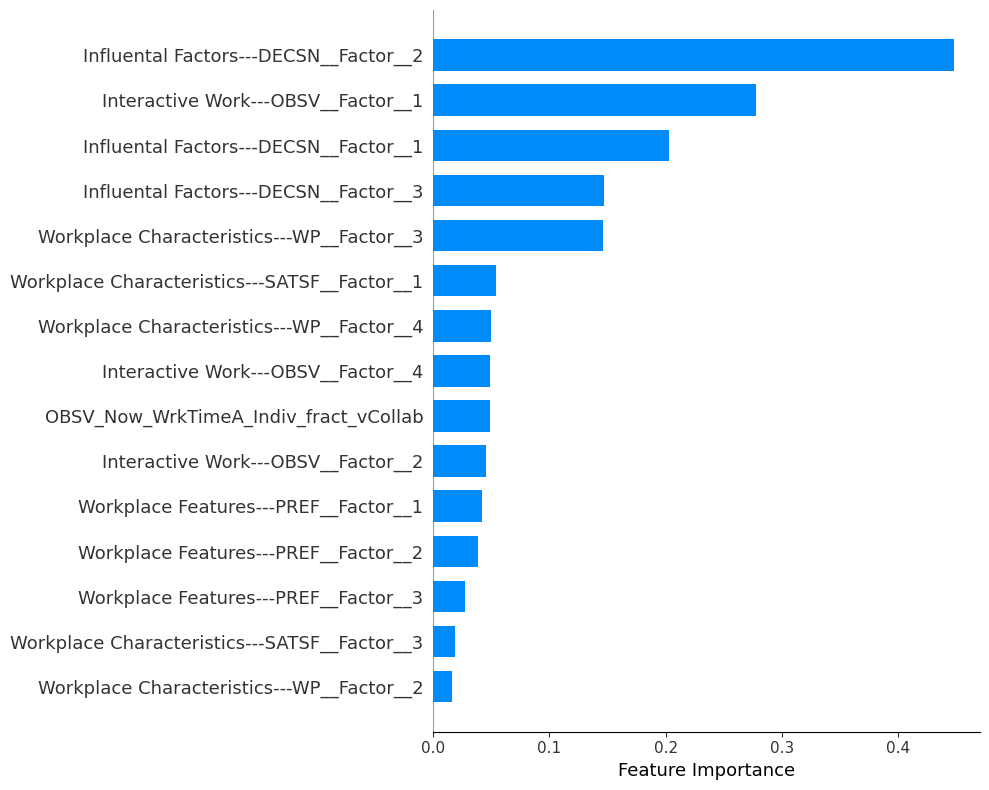

In [126]:
list_dfs_factors = [result_dict[i]['factors'] for i in result_dict.keys()]

final_df = pd.concat(
    list_dfs_factors + [df_single_org[single_org_df_cols[single_org_df_cols['CategoryNew'].isin(single_var_cats)]['Variable name'].values.tolist()]], 
    axis=1
).reset_index(drop=True)

### remove columns with zero variance
final_df = final_df.loc[:, final_df.apply(pd.Series.nunique) != 1]

tgt_y_df = df_single_org[~df_single_org[target_var2].isna()][target_var2].reset_index(drop=True)
not_na_idx = tgt_y_df.index
x_train, x_test, y_train, y_test = train_test_split(final_df.iloc[not_na_idx], tgt_y_df, test_size=0.2, random_state=42)
print("Shapes:", x_train.shape, x_test.shape, y_train.shape, y_test.shape, end="\n\n")

model(x_train, x_test, y_train, y_test, (10, 8), 15)

In [127]:
df_columns['CategoryNew'].unique()

array(['DEMO---DEMO', 'Influental Factors---DEMO',
       'Mobility: Days remote / in-office---OBSV',
       'Interactive Work---OBSV', 'Space Types & Preferences---OBSV',
       'Workplace Satisfactoin / Perfomance---OBSV', 'Workstyle---OBSV',
       'Influental Factors---DECSN', 'Impact Distributed Wrok---PostC',
       'Mobility: Days remote / in-office---PREF',
       'Environmental Preferences---PREF',
       'Space Types & Preferences---PREF', 'Workplace Features---PREF',
       'Workplace Features---SATSF',
       'Workplace Satisfactoin / Perfomance---SATSF',
       'Workplace Characteristics---SATSF',
       'Workplace Characteristics---WP', 'ETC'], dtype=object)

In [129]:
result_dict['Interactive Work---OBSV']['loadings']

Interactive Work---OBSV__Factor__1  \
OBSV_PreC_meeting_A_inperson                           -0.842665   
OBSV_PreC_meeting_B_hyrbid                              0.000000   
OBSV_PreC_meeting_C_remote                             -0.681864   
OBSV_same_space_count_A_1                              -0.295249   
OBSV_same_space_count_B_2n3                            -0.377375   
OBSV_same_space_count_C_4n9                            -0.212501   
OBSV_same_space_count_D_10p                            -0.290904   

                              Interactive Work---OBSV__Factor__2  \
OBSV_PreC_meeting_A_inperson                            0.253403   
OBSV_PreC_meeting_B_hyrbid                             -0.790056   
OBSV_PreC_meeting_C_remote                              0.000000   
OBSV_same_space_count_A_1                               0.000000   
OBSV_same_space_count_B_2n3                            -0.435459   
OBSV_same_space_count_C_4n9                            -0.403313   
OBSV_same_space_count_D_10p                            -0.369056   

                              Interactive Work---OBSV__Factor__3  \
OBSV_PreC_meeting_A_inperson                            0.000000   
OBSV_PreC_meeting_B_hyrbid                              0.000000   
OBSV_PreC_meeting_C_remote                              0.000000   
OBSV_same_space_count_A_1                               0.435916   
OBSV_same_space_count_B_2n3                            -0.560608   
OBSV_same_space_count_C_4n9                             0.386325   
OBSV_same_space_count_D_10p                             0.000000   

                              Interactive Work---OBSV__Factor__4  
OBSV_PreC_meeting_A_inperson                            0.000000  
OBSV_PreC_meeting_B_hyrbid                             -0.229641  
OBSV_PreC_meeting_C_remote                              0.000000  
OBSV_same_space_count_A_1                              -0.245996  
OBSV_same_space_count_B_2n3                             0.000000  
OBSV_same_space_count_C_4n9                             0.382675  
OBSV_same_space_count_D_10p                             0.372887

In [130]:
result_dict['Workplace Characteristics---WP']['loadings']

Workplace Characteristics---WP__Factor__1  \
WP_Featr_office_A_community                                       -0.588479   
WP_Featr_office_C_pride                                           -0.459616   
WP_Featr_office_D_expressme                                       -0.638389   
WP_Featr_office_E_control                                         -0.618721   
WP_Featr_office_F_wellbeing                                       -0.520542   
WP_Featr_office_I_oegculture                                      -0.672359   
WP_Featr_office_J_knowledgeshare                                  -0.456871   

                                  Workplace Characteristics---WP__Factor__2  \
WP_Featr_office_A_community                                        0.259404   
WP_Featr_office_C_pride                                            0.317094   
WP_Featr_office_D_expressme                                        0.000000   
WP_Featr_office_E_control                                         -0.397233   
WP_Featr_office_F_wellbeing                                        0.000000   
WP_Featr_office_I_oegculture                                       0.000000   
WP_Featr_office_J_knowledgeshare                                   0.000000   

                                  Workplace Characteristics---WP__Factor__3  \
WP_Featr_office_A_community                                        0.000000   
WP_Featr_office_C_pride                                            0.000000   
WP_Featr_office_D_expressme                                        0.000000   
WP_Featr_office_E_control                                          0.000000   
WP_Featr_office_F_wellbeing                                       -0.258829   
WP_Featr_office_I_oegculture                                       0.280724   
WP_Featr_office_J_knowledgeshare                                  -0.230122   

                                  Workplace Characteristics---WP__Factor__4  
WP_Featr_office_A_community                                        0.248847  
WP_Featr_office_C_pride                                            0.000000  
WP_Featr_office_D_expressme                                       -0.241838  
WP_Featr_office_E_control                                          0.000000  
WP_Featr_office_F_wellbeing                                        0.000000  
WP_Featr_office_I_oegculture                                       0.000000  
WP_Featr_office_J_knowledgeshare                                   0.000000

In [131]:
result_dict['Workplace Characteristics---SATSF']['loadings']

Workplace Characteristics---SATSF__Factor__1  \
SATSF_office_A_community                                          -0.947336   
SATSF_office_C_pride                                              -0.956795   
SATSF_office_D_expressme                                          -0.956795   
SATSF_office_E_control                                            -0.947336   
SATSF_office_F_wellbeing                                          -0.956795   
SATSF_office_I_orgcullture                                        -0.817185   
SATSF_office_J_knowledgeshare                                     -0.728002   

                               Workplace Characteristics---SATSF__Factor__2  \
SATSF_office_A_community                                          -0.320241   
SATSF_office_C_pride                                               0.290765   
SATSF_office_D_expressme                                           0.290764   
SATSF_office_E_control                                            -0.320241   
SATSF_office_F_wellbeing                                           0.290765   
SATSF_office_I_orgcullture                                        -0.276228   
SATSF_office_J_knowledgeshare                                     -0.246094   

                               Workplace Characteristics---SATSF__Factor__3  \
SATSF_office_A_community                                                0.0   
SATSF_office_C_pride                                                    0.0   
SATSF_office_D_expressme                                                0.0   
SATSF_office_E_control                                                  0.0   
SATSF_office_F_wellbeing                                                0.0   
SATSF_office_I_orgcullture                                              0.0   
SATSF_office_J_knowledgeshare                                           0.0   

                               Workplace Characteristics---SATSF__Factor__4  
SATSF_office_A_community                                           0.000000  
SATSF_office_C_pride                                               0.000000  
SATSF_office_D_expressme                                           0.000000  
SATSF_office_E_control                                             0.000000  
SATSF_office_F_wellbeing                                           0.000000  
SATSF_office_I_orgcullture                                        -0.238108  
SATSF_office_J_knowledgeshare                                      0.000000

# Single Org Analysis - Org 4 (Composite Score)

In [132]:
df_single_org = df_og[df_og['DEMO_Org'] == "Org 4"].copy().reset_index(drop=True)
df_single_org.sum()[df_single_org.sum() == 0].shape

The default value of numeric_only in DataFrame.sum is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.


(117,)

In [133]:
proxy_pref_vars = [
    'PostC_impact_shift_A_focus',
    'PostC_impact_shift_B_productive',
    'PostC_impact_shift_C_collab',
    'PostC_impact_shift_D_videoconf',
    'PostC_impact_shift_E_innovate',
    'PostC_impact_shift_F_colleagueaccess',
    'PostC_impact_shift_G_teammeetings',
    'PostC_impact_shift_H_social',
    'PostC_impact_shift_I_managersconnect',
    'PostC_impact_shift_J_client',
    'PostC_impact_shift_K_enjoy'
]

df_single_org['UPDATED_TARGET_VAR'] = df_single_org[proxy_pref_vars].mean(axis=1)
target_var2 = 'UPDATED_TARGET_VAR'


In [134]:
df_single_org.dropna(axis=1, inplace=True, thresh=df_single_org.shape[0]*0.3)
print(df_single_org.shape)

single_org_df_cols = df_columns[df_columns['Variable name'].isin(df_single_org.columns)].copy()
var_counts = single_org_df_cols.groupby('CategoryNew')['ct'].count().reset_index()
print(var_counts)

target_var = ['Mobility: Days remote / in-office---PREF', 'Impact Distributed Wrok---PostC']
single_var_cats = var_counts[(var_counts['ct'] == 1) & (~var_counts['CategoryNew'].isin(target_var))]['CategoryNew'].values.tolist()
exclude_vars_cat = single_var_cats + target_var + ['DEMO---DEMO']

final_select_vars_cat = [i for i in var_counts.CategoryNew.values if i not in exclude_vars_cat]
final_select_vars_cat, single_var_cats

(243, 66)
                                CategoryNew  ct
0                               DEMO---DEMO   3
1          Environmental Preferences---PREF  14
2           Impact Distributed Wrok---PostC   5
3                   Interactive Work---OBSV  13
4  Mobility: Days remote / in-office---OBSV   2
5          Space Types & Preferences---OBSV   2
6          Space Types & Preferences---PREF   7
7                 Workplace Features---PREF  16
8                Workplace Features---SATSF   2
9                          Workstyle---OBSV   1


(['Environmental Preferences---PREF',
  'Interactive Work---OBSV',
  'Mobility: Days remote / in-office---OBSV',
  'Space Types & Preferences---OBSV',
  'Space Types & Preferences---PREF',
  'Workplace Features---PREF',
  'Workplace Features---SATSF'],
 ['Workstyle---OBSV'])

##########################################################################################
Environmental Preferences---PREF

Shapes: (193, 4) (49, 4) (193,) (49,)

Scores 2.046508380767273 1370337262711081.5 1.167016520894072



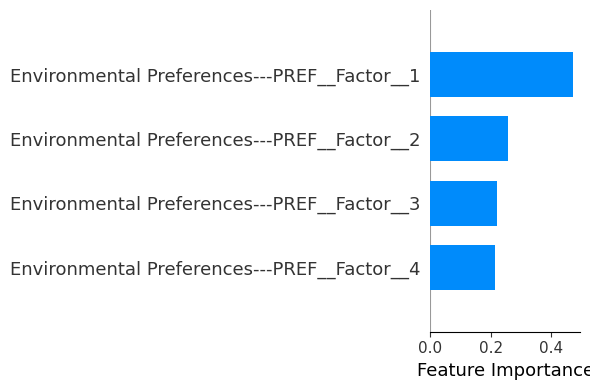

##########################################################################################

##########################################################################################
Interactive Work---OBSV

Shapes: (193, 4) (49, 4) (193,) (49,)

Scores 1.515689923469388 955866043360269.0 1.0035884353741495



##########################################################################################

##########################################################################################
Mobility: Days remote / in-office---OBSV

Shapes: (193, 2) (49, 2) (193,) (49,)

Scores 1.346615388958356 1121652898481130.6 0.9576063177884394



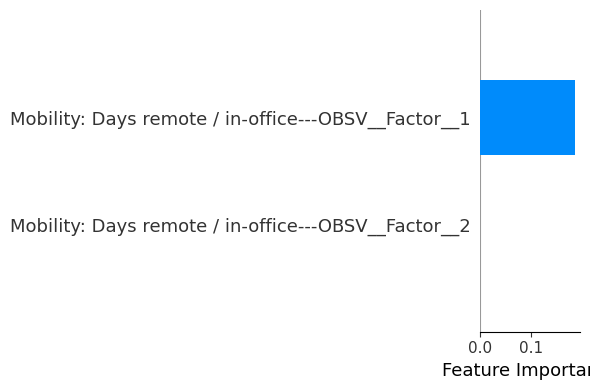

##########################################################################################

##########################################################################################
Space Types & Preferences---OBSV

Shapes: (193, 2) (49, 2) (193,) (49,)

Scores 1.089657426949247 1128818353990496.2 0.8469339164237123



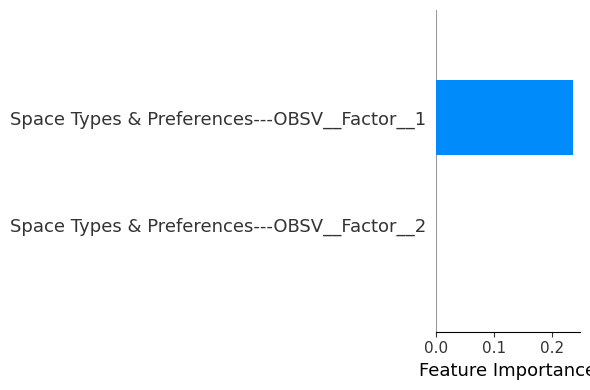

##########################################################################################

##########################################################################################
Space Types & Preferences---PREF

Shapes: (193, 4) (49, 4) (193,) (49,)

Scores 1.5647600985492236 1137767135152442.5 1.0036234493797518



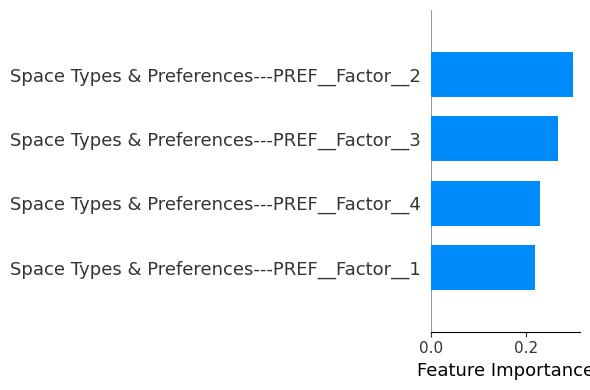

##########################################################################################

##########################################################################################
Workplace Features---PREF

Shapes: (193, 4) (49, 4) (193,) (49,)

Scores 1.8838482615268333 1158068475609556.8 1.127891156462585



##########################################################################################

##########################################################################################
Workplace Features---SATSF

Shapes: (193, 2) (49, 2) (193,) (49,)

Scores 1.174545172283117 1239374804647316.0 0.8710143031571601



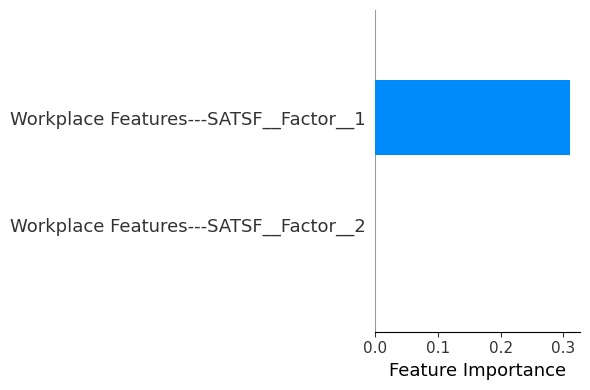

##########################################################################################



In [135]:
result_dict = dict.fromkeys(final_select_vars_cat)

supress_print = True

def model(x_train, x_test, y_train, y_test, plot_size=(6, 4), max_display=10):
    model = DecisionTreeRegressor(max_depth=10)

    model.fit(x_train, y_train)

    ### predict on test data

    y_pred = model.predict(x_test)

    ### evaluate the model

    from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error

    mse = mean_squared_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    print("Scores", mse, mape, mae, end="\n\n")   

    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(x_train)

    shap.summary_plot(shap_values, x_train, plot_type="bar", plot_size=plot_size, max_display=max_display, show=False)
    # plt.savefig('data_tool_demo/overall/shap_summary_plot_v1.png')
    plt.xlabel('Feature Importance')
    plt.show()

for var_cat in final_select_vars_cat:

    print("###"*30)
    print(var_cat, end="\n\n")
    
    cols = single_org_df_cols[single_org_df_cols['CategoryNew'] == var_cat]['Variable name'].values.tolist()
    
    num_factors = min(4, len(cols))

    subset_df_single_var_cat = df_single_org[cols].copy()

    for obj_col in subset_df_single_var_cat.dtypes[subset_df_single_var_cat.dtypes == object].index.values:
        subset_df_single_var_cat[obj_col] = subset_df_single_var_cat[obj_col].map(numeric_mapping_dict)


    subset_df_single_var_cat.fillna(-100000, inplace=True)

    scaler = StandardScaler()
    subset_df_scaled = scaler.fit_transform(subset_df_single_var_cat)
    
    fa = FactorAnalysis(n_components=num_factors, max_iter=5000)
    subset_df_factor = fa.fit_transform(subset_df_scaled)

    factor_col_names = [f"{var_cat}__Factor__{i}" for i in range(1, num_factors+1)]
    factor_df = pd.DataFrame(
        subset_df_factor,
        columns = factor_col_names
    )

    loadings = fa.components_.T  # Transpose so that variables are rows
    # Create a DataFrame for easier interpretation
    loadings_df = pd.DataFrame(
        loadings, 
        index=subset_df_single_var_cat.columns, 
        columns=factor_col_names
    )
    # Identify significant loadings and sort
    threshold = 0.2  # Set your threshold
    significant_loadings = loadings_df[abs(loadings_df) > threshold].fillna(0)

    result_dict[var_cat] = {
        'factors': factor_df,
        'loadings': significant_loadings,
    }

    if not supress_print:
        print(significant_loadings, end="\n\n")


    tgt_y_df = df_single_org[~df_single_org[target_var2].isna()][target_var2].reset_index(drop=True)
    not_na_idx = tgt_y_df.index
    x_train, x_test, y_train, y_test = train_test_split(factor_df.iloc[not_na_idx], tgt_y_df, test_size=0.2, random_state=42)
    print("Shapes:", x_train.shape, x_test.shape, y_train.shape, y_test.shape, end="\n\n")

    model(x_train, x_test, y_train, y_test)

    print("###"*30, end="\n\n")

    # break

In [139]:
final_df.dropna(axis=0)

Environmental Preferences---PREF__Factor__1  \
0                                      -0.411043   
1                                      -0.630669   
2                                      -0.630660   
3                                      -0.151015   
4                                      -0.453552   
..                                           ...   
238                                     0.964221   
239                                    -0.323294   
240                                     3.996933   
241                                    -0.305704   
242                                     0.204683   

     Environmental Preferences---PREF__Factor__2  \
0                                       0.011107   
1                                       0.246632   
2                                       0.246660   
3                                       0.242511   
4                                       0.608426   
..                                           ...   
238                                    -1.316857   
239                                    -0.246695   
240                                     4.133122   
241                                    -0.514488   
242                                    -1.140926   

     Environmental Preferences---PREF__Factor__3  \
0                                       0.445792   
1                                      -0.021278   
2                                      -0.020952   
3                                       1.670330   
4                                       1.125150   
..                                           ...   
238                                     0.971230   
239                                    -0.322663   
240                                     0.602023   
241                                    -0.239420   
242                                    -0.442065   

     Environmental Preferences---PREF__Factor__4  \
0                                      -0.262714   
1                                       0.072446   
2                                       0.072312   
3                                      -0.486664   
4                                       0.418773   
..                                           ...   
238                                    -2.014371   
239                                    -0.336195   
240                                    -1.889919   
241                                    -0.493833   
242                                    -1.062595   

     Interactive Work---OBSV__Factor__1  Interactive Work---OBSV__Factor__2  \
0                             -1.009621                           -0.746600   
1                             -1.009616                           -0.746603   
2                             -0.952251                           -0.518236   
3                              1.181115                            1.452041   
4                             -0.551179                            2.007974   
..                                  ...                                 ...   
238                           -0.938625                            1.791922   
239                           -1.009620                           -0.746596   
240                           -1.011809                           -0.562859   
241                           -0.917893                           -0.311058   
242                           -0.209846                            0.590617   

     Interactive Work---OBSV__Factor__3  Interactive Work---OBSV__Factor__4  \
0                              0.090244                            0.441790   
1                              0.090256                            0.441808   
2                              0.195593                           -0.306702   
3                              0.585673                            1.171732   
4                             -0.907048                            2.860299   
..                                  ...                                 ...   
238

In [142]:
list_dfs_factors = [result_dict[i]['factors'] for i in result_dict.keys()]

final_df = pd.concat(
    list_dfs_factors + [df_single_org[single_org_df_cols[single_org_df_cols['CategoryNew'].isin(single_var_cats)]['Variable name'].values.tolist()]], 
    axis=1
).reset_index(drop=True)

### remove columns with zero variance
final_df = final_df.loc[:, final_df.apply(pd.Series.nunique) != 1]
final_df.dropna(axis=0, inplace=True)

tgt_y_df = df_single_org[~df_single_org[target_var2].isna()][target_var2].reset_index(drop=True)
not_na_idx = tgt_y_df.index
x_train, x_test, y_train, y_test = train_test_split(final_df.iloc[not_na_idx], tgt_y_df, test_size=0.2, random_state=42)
print("Shapes:", x_train.shape, x_test.shape, y_train.shape, y_test.shape, end="\n\n")

model(x_train, x_test, y_train, y_test, (10, 8), 15)

Shapes: (193, 20) (49, 20) (193,) (49,)

Scores 1.858785716969234 1135397293811909.5 1.102632129774987



In [ ]:
df_columns['CategoryNew'].unique()

array(['DEMO---DEMO', 'Influental Factors---DEMO',
       'Mobility: Days remote / in-office---OBSV',
       'Interactive Work---OBSV', 'Space Types & Preferences---OBSV',
       'Workplace Satisfactoin / Perfomance---OBSV', 'Workstyle---OBSV',
       'Influental Factors---DECSN', 'Impact Distributed Wrok---PostC',
       'Mobility: Days remote / in-office---PREF',
       'Environmental Preferences---PREF',
       'Space Types & Preferences---PREF', 'Workplace Features---PREF',
       'Workplace Features---SATSF',
       'Workplace Satisfactoin / Perfomance---SATSF',
       'Workplace Characteristics---SATSF',
       'Workplace Characteristics---WP', 'ETC'], dtype=object)

In [143]:
result_dict['Interactive Work---OBSV']['loadings']

Interactive Work---OBSV__Factor__1  \
OBSV_PreC_interative_A_inperson                             -0.951670   
OBSV_PreC_interative_B_remote                               -0.858876   
OBSV_PreC_meetingsize0ffice_A_1                             -0.713643   
OBSV_PreC_meetingsize0ffice_B_2n3                           -0.728639   
OBSV_PreC_meetingsize0ffice_C_4n9                           -0.915822   
OBSV_PreC_meeting_A_inperson                                -0.879399   
OBSV_PreC_meeting_B_hyrbid                                  -0.945081   
OBSV_PreC_meeting_C_remote                                  -0.579939   
OBSV_same_space_count_A_1                                    0.000000   
OBSV_same_space_count_B_2n3                                  0.000000   
OBSV_same_space_count_C_4n9                                  0.000000   
OBSV_same_space_count_D_10p                                  0.000000   
OBSV_Now_Interact_Work_within_org                            0.000000   

                                   Interactive Work---OBSV__Factor__2  \
OBSV_PreC_interative_A_inperson                              0.000000   
OBSV_PreC_interative_B_remote                                0.000000   
OBSV_PreC_meetingsize0ffice_A_1                             -0.378801   
OBSV_PreC_meetingsize0ffice_B_2n3                           -0.367797   
OBSV_PreC_meetingsize0ffice_C_4n9                            0.000000   
OBSV_PreC_meeting_A_inperson                                 0.000000   
OBSV_PreC_meeting_B_hyrbid                                   0.000000   
OBSV_PreC_meeting_C_remote                                  -0.258064   
OBSV_same_space_count_A_1                                   -0.800242   
OBSV_same_space_count_B_2n3                                 -0.502046   
OBSV_same_space_count_C_4n9                                  0.000000   
OBSV_same_space_count_D_10p                                 -0.351772   
OBSV_Now_Interact_Work_within_org                            0.000000   

                                   Interactive Work---OBSV__Factor__3  \
OBSV_PreC_interative_A_inperson                              0.000000   
OBSV_PreC_interative_B_remote                                0.000000   
OBSV_PreC_meetingsize0ffice_A_1                              0.000000   
OBSV_PreC_meetingsize0ffice_B_2n3                            0.000000   
OBSV_PreC_meetingsize0ffice_C_4n9                            0.000000   
OBSV_PreC_meeting_A_inperson                                -0.271527   
OBSV_PreC_meeting_B_hyrbid                                   0.000000   
OBSV_PreC_meeting_C_remote                                   0.000000   
OBSV_same_space_count_A_1                                    0.000000   
OBSV_same_space_count_B_2n3                                  0.283263   
OBSV_same_space_count_C_4n9                                  0.000000   
OBSV_same_space_count_D_10p                                  0.000000   
OBSV_Now_Interact_Work_within_org                           -0.310973   

                                   Interactive Work---OBSV__Factor__4  
OBSV_PreC_interative_A_inperson                              0.000000  
OBSV_PreC_interative_B_remote                                0.000000  
OBSV_PreC_meetingsize0ffice_A_1                              0.000000  
OBSV_PreC_meetingsize0ffice_B_2n3                            0.281607  
OBSV_PreC_meetingsize0ffice_C_4n9                            0.000000  
OBSV_PreC_meeting_A_inperson                                 0.000000  
OBSV_PreC_meeting_B_hyrbid                                   0.000000  
OBSV_PreC_meeting_C_remote                                   0.380878  
OBSV_same_space_count_A_1                                   -0.258703  
OBSV_same_space_count_B_2n3                                  0.000000  
OBSV_same_space_count_C_4n9                                  0.000000  
OBSV_same_space_count_D_10p                                  0.000000  
OBSV_Now_Interact_Work_within_

In [146]:
result_dict['Space Types & Preferences---PREF']['loadings']

Space Types & Preferences---PREF__Factor__1  \
PREF_space_A_focusedWk                                               -1.0   
PREF_space_B_inperson_collab                                         -1.0   
PREF_space_C_videoconf                                               -1.0   
PREF_space_D_impromptu                                               -1.0   
PREF_space_E_recharge                                                -1.0   
PREF_space_F_accessible                                              -1.0   
PREF_space_G_firstarrive                                             -1.0   

                              Space Types & Preferences---PREF__Factor__2  \
PREF_space_A_focusedWk                                                0.0   
PREF_space_B_inperson_collab                                          0.0   
PREF_space_C_videoconf                                                0.0   
PREF_space_D_impromptu                                                0.0   
PREF_space_E_recharge                                                 0.0   
PREF_space_F_accessible                                               0.0   
PREF_space_G_firstarrive                                              0.0   

                              Space Types & Preferences---PREF__Factor__3  \
PREF_space_A_focusedWk                                                0.0   
PREF_space_B_inperson_collab                                          0.0   
PREF_space_C_videoconf                                                0.0   
PREF_space_D_impromptu                                                0.0   
PREF_space_E_recharge                                                 0.0   
PREF_space_F_accessible                                               0.0   
PREF_space_G_firstarrive                                              0.0   

                              Space Types & Preferences---PREF__Factor__4  
PREF_space_A_focusedWk                                                0.0  
PREF_space_B_inperson_collab                                          0.0  
PREF_space_C_videoconf                                                0.0  
PREF_space_D_impromptu                                                0.0  
PREF_space_E_recharge                                                 0.0  
PREF_space_F_accessible                                               0.0  
PREF_space_G_firstarrive                                              0.0

In [147]:
result_dict['Workplace Features---PREF']['loadings']

Workplace Features---PREF__Factor__1  \
PREF_CollabSpace_A_tech                                         -1.0   
PREF_CollabSpace_C_CollabTools                                  -1.0   
PREF_features_A_chair                                            0.0   
PREF_features_C_concentration                                    0.0   
PREF_features_D_privacy                                          0.0   
PREF_features_E_noise                                            0.0   
PREF_features_F_daylight                                         0.0   
PREF_features_G_light                                            0.0   
PREF_features_H_nature                                           0.0   
PREF_features_M_lockers                                          0.0   
PREF_features_N_events                                           0.0   
PREF_features_O_food                                             0.0   
PREF_features_Q_kitchen                                          0.0   
PREF_features_R_gym                                              0.0   
PREF_features_S_relax                                            0.0   
PREF_features_T_greenspace                                       0.0   

                                Workplace Features---PREF__Factor__2  \
PREF_CollabSpace_A_tech                                     0.000000   
PREF_CollabSpace_C_CollabTools                              0.000000   
PREF_features_A_chair                                      -0.869642   
PREF_features_C_concentration                               0.000000   
PREF_features_D_privacy                                     0.260685   
PREF_features_E_noise                                       0.345459   
PREF_features_F_daylight                                   -0.965927   
PREF_features_G_light                                       0.308535   
PREF_features_H_nature                                      0.000000   
PREF_features_M_lockers                                     0.000000   
PREF_features_N_events                                      0.000000   
PREF_features_O_food                                        0.000000   
PREF_features_Q_kitchen                                     0.000000   
PREF_features_R_gym                                         0.000000   
PREF_features_S_relax                                       0.000000   
PREF_features_T_greenspace                                  0.000000   

                                Workplace Features---PREF__Factor__3  \
PREF_CollabSpace_A_tech                                     0.000000   
PREF_CollabSpace_C_CollabTools                              0.000000   
PREF_features_A_chair                                       0.000000   
PREF_features_C_concentration                               0.000000   
PREF_features_D_privacy                                    -0.244797   
PREF_features_E_noise                                      -0.474939   
PREF_features_F_daylight                                    0.000000   
PREF_features_G_light                                       0.000000   
PREF_features_H_nature                                      0.875968   
PREF_features_M_lockers                                     0.000000   
PREF_features_N_events                                      0.000000   
PREF_features_O_food                                        0.000000   
PREF_features_Q_kitchen                                     0.000000   
PREF_features_R_gym                                         0.000000   
PREF_features_S_relax                                       0.000000   
PREF_features_T_greenspace                                  0.241824   

                                Workplace Features---PREF__Factor__4  
PREF_CollabSpace_A_tech                                     0.000000  
PREF_CollabSpace_C_CollabTools                              0.000000  
PREF_features_A_chair                                       0.000000  
PREF_features_C_concentration                               0.000000  
PR

# Single Org Analysis (Org 3) - Composite Score

In [170]:
df_single_org = df_og[df_og['DEMO_Org'] == "Org 1"].copy().reset_index(drop=True)
df_single_org.sum()[df_single_org.sum() == 0].shape

The default value of numeric_only in DataFrame.sum is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.


(66,)

In [171]:
proxy_pref_vars = [
    'PostC_impact_shift_A_focus',
    'PostC_impact_shift_B_productive',
    'PostC_impact_shift_C_collab',
    'PostC_impact_shift_D_videoconf',
    'PostC_impact_shift_E_innovate',
    'PostC_impact_shift_F_colleagueaccess',
    'PostC_impact_shift_G_teammeetings',
    'PostC_impact_shift_H_social',
    'PostC_impact_shift_I_managersconnect',
    'PostC_impact_shift_J_client',
    'PostC_impact_shift_K_enjoy'
]

df_single_org['UPDATED_TARGET_VAR'] = df_single_org[proxy_pref_vars].mean(axis=1)
target_var2 = 'UPDATED_TARGET_VAR'


In [172]:
df_single_org.dropna(axis=1, inplace=True, thresh=df_single_org.shape[0]*0.2)
print(df_single_org.shape)

single_org_df_cols = df_columns[df_columns['Variable name'].isin(df_single_org.columns)].copy()
var_counts = single_org_df_cols.groupby('CategoryNew')['ct'].count().reset_index()
print(var_counts)

target_var = ['Mobility: Days remote / in-office---PREF', 'Impact Distributed Wrok---PostC']
single_var_cats = var_counts[(var_counts['ct'] == 1) & (~var_counts['CategoryNew'].isin(target_var))]['CategoryNew'].values.tolist()
exclude_vars_cat = single_var_cats + target_var + ['DEMO---DEMO']

final_select_vars_cat = [i for i in var_counts.CategoryNew.values if i not in exclude_vars_cat]
final_select_vars_cat, single_var_cats

(85, 127)
                                    CategoryNew  ct
0                                   DEMO---DEMO   3
1              Environmental Preferences---PREF  14
2               Impact Distributed Wrok---PostC  12
3                     Influental Factors---DEMO   1
4                       Interactive Work---OBSV   6
5      Mobility: Days remote / in-office---OBSV   8
6      Mobility: Days remote / in-office---PREF   1
7              Space Types & Preferences---OBSV   8
8              Space Types & Preferences---PREF   7
9             Workplace Characteristics---SATSF  10
10               Workplace Characteristics---WP  10
11                    Workplace Features---PREF  22
12                   Workplace Features---SATSF   5
13   Workplace Satisfactoin / Perfomance---OBSV  12
14  Workplace Satisfactoin / Perfomance---SATSF   6
15                             Workstyle---OBSV   1


(['Environmental Preferences---PREF',
  'Interactive Work---OBSV',
  'Mobility: Days remote / in-office---OBSV',
  'Space Types & Preferences---OBSV',
  'Space Types & Preferences---PREF',
  'Workplace Characteristics---SATSF',
  'Workplace Characteristics---WP',
  'Workplace Features---PREF',
  'Workplace Features---SATSF',
  'Workplace Satisfactoin / Perfomance---OBSV',
  'Workplace Satisfactoin / Perfomance---SATSF'],
 ['Influental Factors---DEMO', 'Workstyle---OBSV'])

##########################################################################################
Environmental Preferences---PREF

Shapes: (64, 4) (16, 4) (64,) (16,)

Scores 3.2089723186728394 0.6718516841772383 1.4956597222222223



##########################################################################################

##########################################################################################
Interactive Work---OBSV

Shapes: (64, 4) (16, 4) (64,) (16,)

Scores 2.315954861111111 0.623502504797858 1.2572916666666667



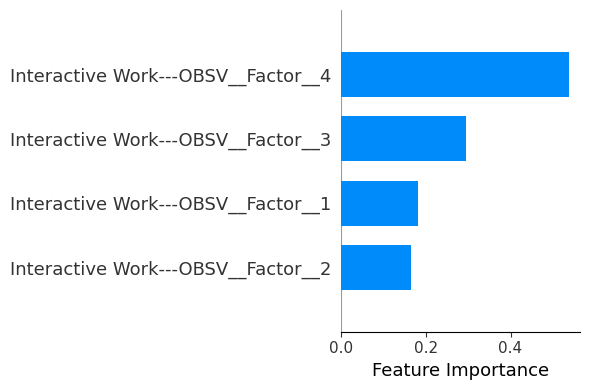

##########################################################################################

##########################################################################################
Mobility: Days remote / in-office---OBSV

Shapes: (64, 4) (16, 4) (64,) (16,)

Scores 1.2500218982268834 0.42458148443132704 0.9403521825396824



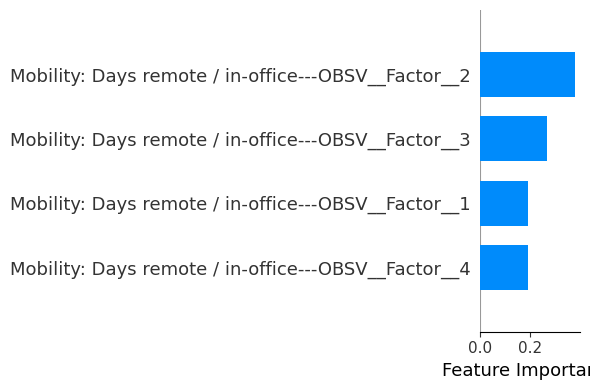

##########################################################################################

##########################################################################################
Space Types & Preferences---OBSV

Shapes: (64, 4) (16, 4) (64,) (16,)

Scores 2.081163194444444 0.5254697223214992 1.140625



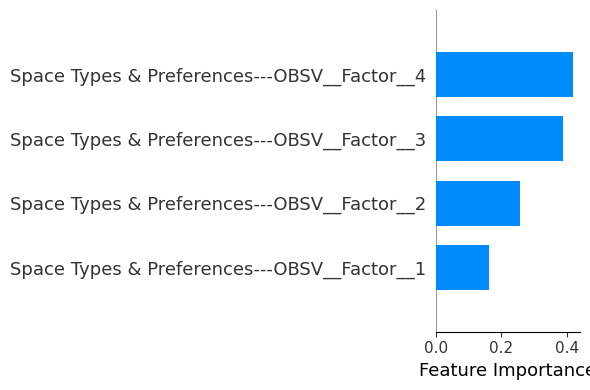

##########################################################################################

##########################################################################################
Space Types & Preferences---PREF

Shapes: (64, 4) (16, 4) (64,) (16,)

Scores 2.896714952256945 0.7531464414231834 1.4231770833333335



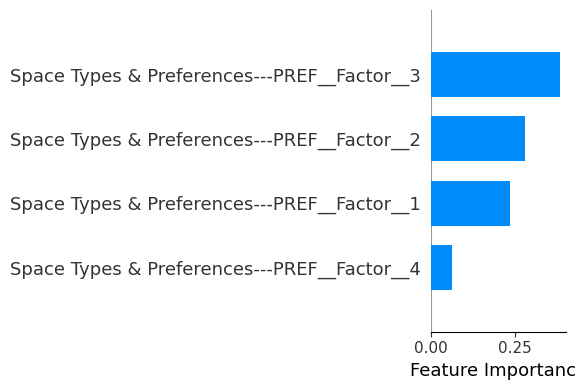

##########################################################################################

##########################################################################################
Workplace Characteristics---SATSF

Shapes: (64, 4) (16, 4) (64,) (16,)

Scores 1.492283950617284 0.4383524150802084 1.0104166666666665



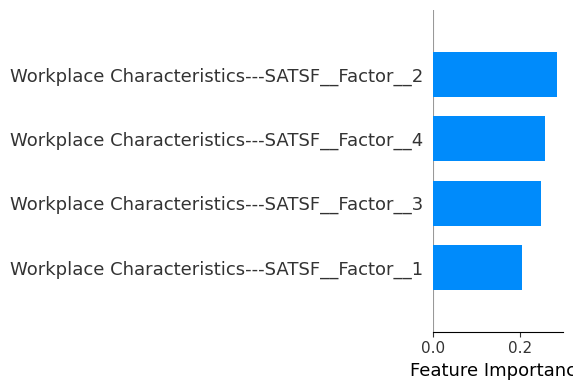

##########################################################################################

##########################################################################################
Workplace Characteristics---WP

Shapes: (64, 4) (16, 4) (64,) (16,)

Scores 0.9049479166666666 0.42797621582920586 0.796875



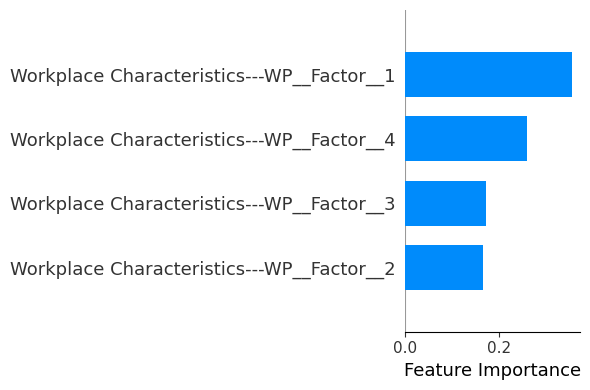

##########################################################################################

##########################################################################################
Workplace Features---PREF

Shapes: (64, 4) (16, 4) (64,) (16,)

Scores 1.6762798438934798 0.4180236886247006 0.96875



##########################################################################################

##########################################################################################
Workplace Features---SATSF

Shapes: (64, 4) (16, 4) (64,) (16,)

Scores 2.1425849066840277 0.497038077544804 1.130859375



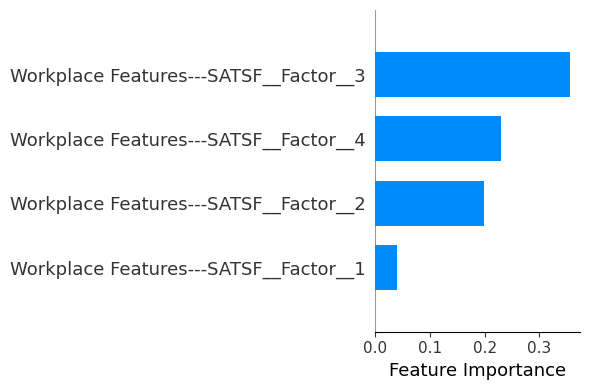

##########################################################################################

##########################################################################################
Workplace Satisfactoin / Perfomance---OBSV

Shapes: (64, 4) (16, 4) (64,) (16,)

Scores 2.2816237461419755 0.5711335475623103 1.1692708333333333



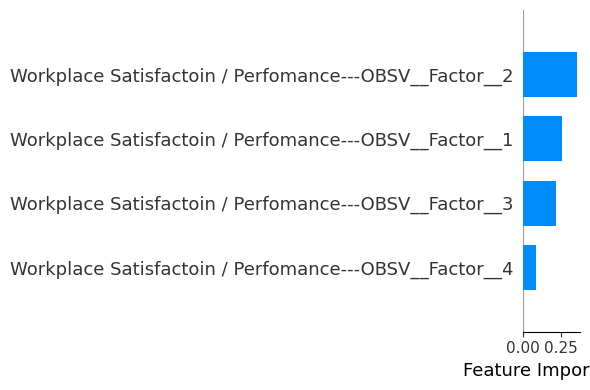

##########################################################################################

##########################################################################################
Workplace Satisfactoin / Perfomance---SATSF

Shapes: (64, 4) (16, 4) (64,) (16,)

Scores 1.8418572156872006 0.5320905456832185 1.1113839285714286



##########################################################################################



In [173]:
result_dict = dict.fromkeys(final_select_vars_cat)

supress_print = True

def model(x_train, x_test, y_train, y_test, plot_size=(6, 4), max_display=10):
    model = DecisionTreeRegressor(max_depth=10)

    model.fit(x_train, y_train)

    ### predict on test data

    y_pred = model.predict(x_test)

    ### evaluate the model

    from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error

    mse = mean_squared_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    print("Scores", mse, mape, mae, end="\n\n")   

    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(x_train)

    shap.summary_plot(shap_values, x_train, plot_type="bar", plot_size=plot_size, max_display=max_display, show=False)
    # plt.savefig('data_tool_demo/overall/shap_summary_plot_v1.png')
    plt.xlabel('Feature Importance')
    plt.show()

for var_cat in final_select_vars_cat:

    print("###"*30)
    print(var_cat, end="\n\n")
    
    cols = single_org_df_cols[single_org_df_cols['CategoryNew'] == var_cat]['Variable name'].values.tolist()
    
    num_factors = min(4, len(cols))

    subset_df_single_var_cat = df_single_org[cols].copy()

    for obj_col in subset_df_single_var_cat.dtypes[subset_df_single_var_cat.dtypes == object].index.values:
        subset_df_single_var_cat[obj_col] = subset_df_single_var_cat[obj_col].map(numeric_mapping_dict)


    subset_df_single_var_cat.fillna(-100000, inplace=True)

    scaler = StandardScaler()
    subset_df_scaled = scaler.fit_transform(subset_df_single_var_cat)
    
    fa = FactorAnalysis(n_components=num_factors, max_iter=5000)
    subset_df_factor = fa.fit_transform(subset_df_scaled)

    factor_col_names = [f"{var_cat}__Factor__{i}" for i in range(1, num_factors+1)]
    factor_df = pd.DataFrame(
        subset_df_factor,
        columns = factor_col_names
    )

    loadings = fa.components_.T  # Transpose so that variables are rows
    # Create a DataFrame for easier interpretation
    loadings_df = pd.DataFrame(
        loadings, 
        index=subset_df_single_var_cat.columns, 
        columns=factor_col_names
    )
    # Identify significant loadings and sort
    threshold = 0.2  # Set your threshold
    significant_loadings = loadings_df[abs(loadings_df) > threshold].fillna(0)

    result_dict[var_cat] = {
        'factors': factor_df,
        'loadings': significant_loadings,
    }

    if not supress_print:
        print(significant_loadings, end="\n\n")


    tgt_y_df = df_single_org[~df_single_org[target_var2].isna()][target_var2].reset_index(drop=True)
    not_na_idx = tgt_y_df.index
    x_train, x_test, y_train, y_test = train_test_split(factor_df.iloc[not_na_idx], tgt_y_df, test_size=0.2, random_state=42)
    print("Shapes:", x_train.shape, x_test.shape, y_train.shape, y_test.shape, end="\n\n")

    model(x_train, x_test, y_train, y_test)

    print("###"*30, end="\n\n")

    # break

Shapes: (64, 46) (16, 46) (64,) (16,)

Scores 2.6727912808641974 0.6810022773546226 1.3246527777777777



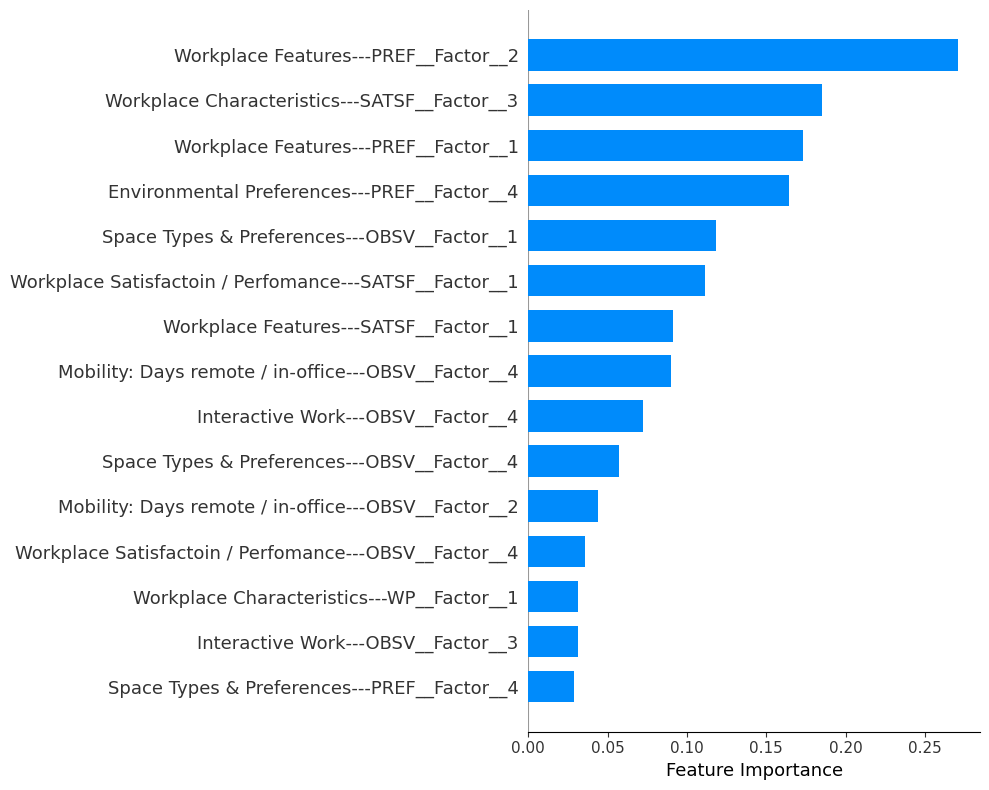

In [174]:
list_dfs_factors = [result_dict[i]['factors'] for i in result_dict.keys()]

final_df = pd.concat(
    list_dfs_factors + [df_single_org[single_org_df_cols[single_org_df_cols['CategoryNew'].isin(single_var_cats)]['Variable name'].values.tolist()]], 
    axis=1
).reset_index(drop=True)

### remove columns with zero variance
final_df = final_df.loc[:, final_df.apply(pd.Series.nunique) != 1]
final_df.fillna(-100000, inplace=True)

tgt_y_df = df_single_org[~df_single_org[target_var2].isna()][target_var2].reset_index(drop=True)
not_na_idx = tgt_y_df.index
x_train, x_test, y_train, y_test = train_test_split(final_df.iloc[not_na_idx], tgt_y_df, test_size=0.2, random_state=42)
print("Shapes:", x_train.shape, x_test.shape, y_train.shape, y_test.shape, end="\n\n")

model(x_train, x_test, y_train, y_test, (10, 8), 15)

In [154]:
df_columns['CategoryNew'].unique()

array(['DEMO---DEMO', 'Influental Factors---DEMO',
       'Mobility: Days remote / in-office---OBSV',
       'Interactive Work---OBSV', 'Space Types & Preferences---OBSV',
       'Workplace Satisfactoin / Perfomance---OBSV', 'Workstyle---OBSV',
       'Influental Factors---DECSN', 'Impact Distributed Wrok---PostC',
       'Mobility: Days remote / in-office---PREF',
       'Environmental Preferences---PREF',
       'Space Types & Preferences---PREF', 'Workplace Features---PREF',
       'Workplace Features---SATSF',
       'Workplace Satisfactoin / Perfomance---SATSF',
       'Workplace Characteristics---SATSF',
       'Workplace Characteristics---WP', 'ETC'], dtype=object)

In [175]:
result_dict['Workplace Satisfactoin / Perfomance---OBSV']['loadings']

Workplace Satisfactoin / Perfomance---OBSV__Factor__1  \
OBSV_PreC_5A_lost_layout                                               -0.716301       
OBSV_PreC_5B_lost_looking                                              -0.467960       
OBSV_PreC_5C_lost_perstech                                             -0.589012       
OBSV_PreC_5D_lost_roomtech                                             -0.675243       
OBSV_PreC_5E_lost_visitors                                             -0.659590       
OBSV_PreC_5F_lost_noise                                                -0.531033       
OBSV_PreC_5G_lost_comms                                                -0.565991       
OBSV_PreC_5H_lost_ergo                                                 -0.871093       
OBSV_PreC_5I_lost_temp                                                 -0.857932       
OBSV_PreC_5J_lost_odor                                                 -0.932483       
OBSV_PreC_5K_lost_natlight                                             -0.913356       
OBSV_PreC_5L_lost_indoorlight                                          -0.846151       

                               Workplace Satisfactoin / Perfomance---OBSV__Factor__2  \
OBSV_PreC_5A_lost_layout                                                0.000000       
OBSV_PreC_5B_lost_looking                                               0.000000       
OBSV_PreC_5C_lost_perstech                                              0.000000       
OBSV_PreC_5D_lost_roomtech                                              0.000000       
OBSV_PreC_5E_lost_visitors                                              0.678904       
OBSV_PreC_5F_lost_noise                                                 0.000000       
OBSV_PreC_5G_lost_comms                                                 0.319125       
OBSV_PreC_5H_lost_ergo                                                  0.000000       
OBSV_PreC_5I_lost_temp                                                  0.000000       
OBSV_PreC_5J_lost_odor                                                  0.000000       
OBSV_PreC_5K_lost_natlight                                              0.000000       
OBSV_PreC_5L_lost_indoorlight                                           0.000000       

                               Workplace Satisfactoin / Perfomance---OBSV__Factor__3  \
OBSV_PreC_5A_lost_layout                                                0.000000       
OBSV_PreC_5B_lost_looking                                               0.000000       
OBSV_PreC_5C_lost_perstech                                              0.000000       
OBSV_PreC_5D_lost_roomtech                                              0.366913       
OBSV_PreC_5E_lost_visitors                                              0.000000       
OBSV_PreC_5F_lost_noise                                                -0.316171       
OBSV_PreC_5G_lost_comms                                                 0.000000       
OBSV_PreC_5H_lost_ergo                                                  0.000000       
OBSV_PreC_5I_lost_temp                                                 -0.204019       
OBSV_PreC_5J_lost_odor                                                  0.232531       
OBSV_PreC_5K_lost_natlight                                              0.000000       
OBSV_PreC_5L_lost_indoorlight                                          -0.307061       

                               Workplace Satisfactoin / Perfomance---OBSV__Factor__4  
OBSV_PreC_5A_lost_layout                                               -0.231369      
OBSV_PreC_5B_lost_looking                                               0.000000      
OBSV_PreC_5C_lost_perstech                                              0.238531      
OBSV_PreC_5D_lost_roomtech                                              0.257919      
OBSV_PreC_5E_lost_visitors                                              0.000000      
OBSV_PreC_5F_lost_noise                                                 0.

In [ ]:
result_dict['Space Types & Preferences---PREF']['loadings']

Space Types & Preferences---PREF__Factor__1  \
PREF_space_A_focusedWk                                               -1.0   
PREF_space_B_inperson_collab                                         -1.0   
PREF_space_C_videoconf                                               -1.0   
PREF_space_D_impromptu                                               -1.0   
PREF_space_E_recharge                                                -1.0   
PREF_space_F_accessible                                              -1.0   
PREF_space_G_firstarrive                                             -1.0   

                              Space Types & Preferences---PREF__Factor__2  \
PREF_space_A_focusedWk                                                0.0   
PREF_space_B_inperson_collab                                          0.0   
PREF_space_C_videoconf                                                0.0   
PREF_space_D_impromptu                                                0.0   
PREF_space_E_recharge                                                 0.0   
PREF_space_F_accessible                                               0.0   
PREF_space_G_firstarrive                                              0.0   

                              Space Types & Preferences---PREF__Factor__3  \
PREF_space_A_focusedWk                                                0.0   
PREF_space_B_inperson_collab                                          0.0   
PREF_space_C_videoconf                                                0.0   
PREF_space_D_impromptu                                                0.0   
PREF_space_E_recharge                                                 0.0   
PREF_space_F_accessible                                               0.0   
PREF_space_G_firstarrive                                              0.0   

                              Space Types & Preferences---PREF__Factor__4  
PREF_space_A_focusedWk                                                0.0  
PREF_space_B_inperson_collab                                          0.0  
PREF_space_C_videoconf                                                0.0  
PREF_space_D_impromptu                                                0.0  
PREF_space_E_recharge                                                 0.0  
PREF_space_F_accessible                                               0.0  
PREF_space_G_firstarrive                                              0.0

In [159]:
result_dict['Workplace Characteristics---WP']['loadings']

Workplace Characteristics---WP__Factor__1  \
WP_Featr_office_A_community                                         -0.536927   
WP_Featr_office_B_designexcellence                                  -0.526219   
WP_Featr_office_C_pride                                             -0.556985   
WP_Featr_office_D_expressme                                         -0.411096   
WP_Featr_office_E_control                                           -0.367435   
WP_Featr_office_F_wellbeing                                         -0.916215   
WP_Featr_office_G_myfamily                                          -0.693033   
WP_Featr_office_H_customers                                         -0.324646   
WP_Featr_office_I_oegculture                                        -0.526262   
WP_Featr_office_J_knowledgeshare                                    -0.498891   
WP_Featr_office_K_planet                                            -0.394903   

                                    Workplace Characteristics---WP__Factor__2  \
WP_Featr_office_A_community                                         -0.497752   
WP_Featr_office_B_designexcellence                                  -0.527486   
WP_Featr_office_C_pride                                             -0.489678   
WP_Featr_office_D_expressme                                          0.000000   
WP_Featr_office_E_control                                            0.000000   
WP_Featr_office_F_wellbeing                                          0.283538   
WP_Featr_office_G_myfamily                                           0.000000   
WP_Featr_office_H_customers                                         -0.490517   
WP_Featr_office_I_oegculture                                        -0.465089   
WP_Featr_office_J_knowledgeshare                                    -0.404106   
WP_Featr_office_K_planet                                            -0.250694   

                                    Workplace Characteristics---WP__Factor__3  \
WP_Featr_office_A_community                                          0.000000   
WP_Featr_office_B_designexcellence                                  -0.220239   
WP_Featr_office_C_pride                                             -0.288950   
WP_Featr_office_D_expressme                                          0.000000   
WP_Featr_office_E_control                                            0.000000   
WP_Featr_office_F_wellbeing                                          0.000000   
WP_Featr_office_G_myfamily                                           0.000000   
WP_Featr_office_H_customers                                          0.000000   
WP_Featr_office_I_oegculture                                         0.000000   
WP_Featr_office_J_knowledgeshare                                     0.000000   
WP_Featr_office_K_planet                                             0.421313   

                                    Workplace Characteristics---WP__Factor__4  
WP_Featr_office_A_community                                          0.000000  
WP_Featr_office_B_designexcellence                                   0.000000  
WP_Featr_office_C_pride                                              0.000000  
WP_Featr_office_D_expressme                                         -0.355418  
WP_Featr_office_E_control                                           -0.299878  
WP_Featr_office_F_wellbeing                                          0.000000  
WP_Featr_office_G_myfamily                                           0.000000  
WP_Featr_office_H_customers                                          0.283216  
WP_Featr_office_I_oegculture                                         0.000000  
WP_Featr_office_J_knowledgeshare                                     0.000000  
WP_Featr_office_K_planet                                            -0.210267

# COMBINED OVERALL MODEL (COMPOSITE TARGET)

In [288]:
df_single_org = df_og.copy().reset_index(drop=True)
df_single_org.sum()[df_single_org.sum() == 0].shape

proxy_pref_vars = [
    'PostC_impact_shift_A_focus',
    'PostC_impact_shift_B_productive',
    'PostC_impact_shift_C_collab',
    'PostC_impact_shift_D_videoconf',
    'PostC_impact_shift_E_innovate',
    'PostC_impact_shift_F_colleagueaccess',
    'PostC_impact_shift_G_teammeetings',
    'PostC_impact_shift_H_social',
    'PostC_impact_shift_I_managersconnect',
    'PostC_impact_shift_J_client',
    'PostC_impact_shift_K_enjoy'
]

df_single_org['UPDATED_TARGET_VAR'] = df_single_org[proxy_pref_vars].mean(axis=1)
target_var2 = 'UPDATED_TARGET_VAR'

df_single_org.dropna(axis=1, inplace=True, thresh=df_single_org.shape[0]*0.2)
print(df_single_org.shape)

single_org_df_cols = df_columns[df_columns['Variable name'].isin(df_single_org.columns)].copy()
var_counts = single_org_df_cols.groupby('CategoryNew')['ct'].count().reset_index()
print(var_counts)

target_var = ['Mobility: Days remote / in-office---PREF', 'Impact Distributed Wrok---PostC']
single_var_cats = var_counts[(var_counts['ct'] == 1) & (~var_counts['CategoryNew'].isin(target_var))]['CategoryNew'].values.tolist()
exclude_vars_cat = single_var_cats + target_var + ['DEMO---DEMO']

final_select_vars_cat = [i for i in var_counts.CategoryNew.values if i not in exclude_vars_cat]
final_select_vars_cat, single_var_cats

(1384, 170)
                                    CategoryNew  ct
0                                   DEMO---DEMO   3
1                                           ETC   8
2              Environmental Preferences---PREF  14
3               Impact Distributed Wrok---PostC  17
4                    Influental Factors---DECSN  15
5                     Influental Factors---DEMO   1
6                       Interactive Work---OBSV   9
7      Mobility: Days remote / in-office---OBSV   2
8      Mobility: Days remote / in-office---PREF   1
9              Space Types & Preferences---OBSV   8
10             Space Types & Preferences---PREF   7
11            Workplace Characteristics---SATSF  11
12               Workplace Characteristics---WP  11
13                    Workplace Features---PREF  23
14                   Workplace Features---SATSF  14
15   Workplace Satisfactoin / Perfomance---OBSV  12
16  Workplace Satisfactoin / Perfomance---SATSF  12
17                             Workstyle---OBSV   1


The default value of numeric_only in DataFrame.sum is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.


(['ETC',
  'Environmental Preferences---PREF',
  'Influental Factors---DECSN',
  'Interactive Work---OBSV',
  'Mobility: Days remote / in-office---OBSV',
  'Space Types & Preferences---OBSV',
  'Space Types & Preferences---PREF',
  'Workplace Characteristics---SATSF',
  'Workplace Characteristics---WP',
  'Workplace Features---PREF',
  'Workplace Features---SATSF',
  'Workplace Satisfactoin / Perfomance---OBSV',
  'Workplace Satisfactoin / Perfomance---SATSF'],
 ['Influental Factors---DEMO', 'Workstyle---OBSV'])

In [289]:
def model(x_train, x_test, y_train, y_test, plot_size=(6, 4), max_display=10):
    model = DecisionTreeRegressor(max_depth=10)

    model.fit(x_train, y_train)

    ### predict on test data

    y_pred = model.predict(x_test)

    ### evaluate the model

    from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error

    mse = mean_squared_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    print("Scores", mse, mape, mae, end="\n\n")   

    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(x_train)

    shap.summary_plot(shap_values, x_train, plot_type="bar", plot_size=plot_size, max_display=max_display, show=False)
    # plt.savefig('data_tool_demo/overall/shap_summary_plot_v1.png')
    plt.xlabel('Feature Importance')
    plt.show()

    shap.summary_plot(shap_values, x_train, plot_type="dot", plot_size=plot_size, max_display=max_display, show=False)
    # plt.savefig('data_tool_demo/overall/shap_summary_plot_v1.png')
    plt.xlabel('Feature Importance')
    plt.show()

##########################################################################################
Shapes: (1102, 10) (276, 10) (1102,) (276,)

Scores 1.2853133605053078 254683567754321.5 0.8545906366590055



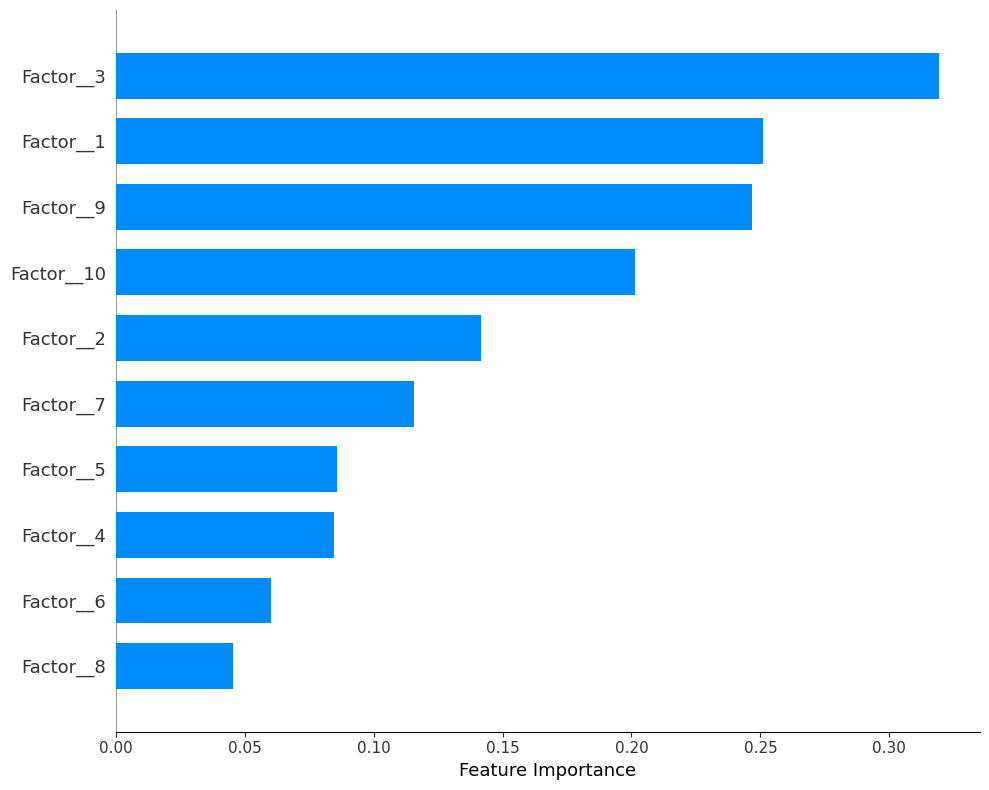

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


##########################################################################################



In [332]:
print("###"*30)

cols = single_org_df_cols[single_org_df_cols['CategoryNew'].isin(final_select_vars_cat+single_var_cats)]['Variable name'].values.tolist()

num_factors = min(10, len(cols))

subset_df_single_var_cat = df_single_org[cols].copy()

for obj_col in subset_df_single_var_cat.dtypes[subset_df_single_var_cat.dtypes == object].index.values:
    subset_df_single_var_cat[obj_col] = subset_df_single_var_cat[obj_col].map(numeric_mapping_dict)


subset_df_single_var_cat.fillna(-100000, inplace=True)

scaler = StandardScaler()
subset_df_scaled = scaler.fit_transform(subset_df_single_var_cat)

fa = FactorAnalysis(n_components=num_factors, max_iter=5000)
subset_df_factor = fa.fit_transform(subset_df_scaled)

factor_col_names = [f"Factor__{i}" for i in range(1, num_factors+1)]
factor_df = pd.DataFrame(
    subset_df_factor,
    columns = factor_col_names
)

loadings = fa.components_.T  # Transpose so that variables are rows
# Create a DataFrame for easier interpretation
loadings_df = pd.DataFrame(
    loadings, 
    index=subset_df_single_var_cat.columns, 
    columns=factor_col_names
)
# Identify significant loadings and sort
threshold = 0.1  # Set your threshold
significant_loadings = loadings_df[abs(loadings_df) > threshold].fillna(0)

result_dict[var_cat] = {
    'factors': factor_df,
    'loadings': significant_loadings,
}

if not supress_print:
    print(significant_loadings, end="\n\n")


tgt_y_df = df_single_org[~df_single_org[target_var2].isna()][target_var2].reset_index(drop=True)
not_na_idx = tgt_y_df.index
x_train, x_test, y_train, y_test = train_test_split(factor_df.iloc[not_na_idx], tgt_y_df, test_size=0.2, random_state=42)
print("Shapes:", x_train.shape, x_test.shape, y_train.shape, y_test.shape, end="\n\n")

model(x_train, x_test, y_train, y_test, (10, 8), 20)

print("###"*30, end="\n\n")

In [345]:
result_dict[var_cat]['loadings'].sort_values('Factor__3', key=abs, ascending=False).head(20)

Factor__1  Factor__2  Factor__3  Factor__4  \
PREF_features_D_privacy           0.701868   0.415481   0.563372  -0.124015   
PREF_features_F_daylight          0.701870   0.415481   0.563371  -0.124015   
PREF_features_E_noise             0.701869   0.415483   0.563371  -0.124014   
PREF_features_H_nature            0.701874   0.415480   0.563366  -0.124013   
PREF_features_G_light             0.701877   0.415479   0.563363  -0.124012   
SATSF_CollabSpace_A_Tech          0.702279   0.416839   0.563052  -0.122351   
PREF_CollabSpace_C_CollabTools    0.702278   0.416844   0.563049  -0.122350   
SATSF_CollabSpace_C_CollabTools   0.702281   0.416840   0.563049  -0.122350   
PREF_CollabSpace_A_tech           0.702280   0.416842   0.563048  -0.122349   
PREF_space_E_recharge             0.702937   0.403353   0.555910  -0.142425   
PREF_space_G_firstarrive          0.702937   0.403351   0.555910  -0.142426   
PREF_Envr_Collab_2E_light         0.697486   0.385909   0.550221  -0.141855   
PREF_Envr_Focus_1E_light          0.682738   0.393522   0.538704  -0.138089   
PREF_Envr_Collab_2H_energy        0.685278   0.364987   0.525027  -0.135504   
PREF_Envr_Focus_1H_energy         0.646399   0.369595   0.507204  -0.127127   
PREF_Envr_Collab_2D_color         0.678562   0.351779   0.503352  -0.129361   
PREF_Envr_Collab_2B_closure       0.658150   0.348549   0.485030  -0.124266   
PREF_Envr_Focus_1D_color          0.643472   0.358521   0.482249  -0.123206   
PREF_Envr_Collab_2A_activity      0.663756   0.349744   0.472120  -0.116529   
PREF_Envr_Collab_2F_formality     0.677442   0.342830   0.462196  -0.116628   

                                 Factor__5  Factor__6  Factor__7  Factor__8  \
PREF_features_D_privacy           0.000000        0.0        0.0        0.0   
PREF_features_F_daylight          0.000000        0.0        0.0        0.0   
PREF_features_E_noise             0.000000        0.0        0.0        0.0   
PREF_features_H_nature            0.000000        0.0        0.0        0.0   
PREF_features_G_light             0.000000        0.0        0.0        0.0   
SATSF_CollabSpace_A_Tech          0.000000        0.0        0.0        0.0   
PREF_CollabSpace_C_CollabTools    0.000000        0.0        0.0        0.0   
SATSF_CollabSpace_C_CollabTools   0.000000        0.0        0.0        0.0   
PREF_CollabSpace_A_tech           0.000000        0.0        0.0        0.0   
PREF_space_E_recharge             0.000000        0.0        0.0        0.0   
PREF_space_G_firstarrive          0.000000        0.0        0.0        0.0   
PREF_Envr_Collab_2E_light         0.000000        0.0        0.0        0.0   
PREF_Envr_Focus_1E_light          0.000000        0.0        0.0        0.0   
PREF_Envr_Collab_2H_energy        0.102326        0.0        0.0        0.0   
PREF_Envr_Focus_1H_energy         0.000000        0.0        0.0        0.0   
PREF_Envr_Collab_2D_color         0.000000        0.0        0.0        0.0   
PREF_Envr_Collab_2B_closure       0.000000        0.0        0.0        0.0   
PREF_Envr_Focus_1D_color          0.000000        0.0        0.0        0.0   
PREF_Envr_Collab_2A_activity      0.000000        0.0        0.0        0.0   
PREF_Envr_Collab_2F_formality     0.000000        0.0        0.0        0.0   

                                 Factor__9  Factor__10  
PREF_features_D_privacy                0.0         0.0  
PREF_features_F_daylight               0.0         0.0  
PREF_features_E_noise                  0.0         0.0  
PREF_features_H_nature                 0.0         0.0  
PREF_features_G_light                  0.0         0.0  
SATSF_CollabSpace_A_Tech               0.0         0.0  
PREF_CollabSpace_C_CollabTools         0.0         0.0  
SATSF_CollabSpace_C_CollabTools        0.0         0.0  
PREF_CollabSpace_A_tech                0.0         0.0  
PREF_space_E_recharge                  0.0         0.0  
PREF_space_G_firstarrive               0.0         0.0  
PREF_Envr_Collab_2E_light    

In [269]:
df_single_org.groupby(['OBSV_PreC_5J_lost_odor'])[target_var2].mean().sort_values()

OBSV_PreC_5J_lost_odor
4.0       1.611111
30.0      2.225000
60.0      2.333333
100.0     2.416667
1000.0    2.500000
50.0      2.592593
200.0     2.625000
5.0       2.823232
0.0       2.831713
10.0      2.998148
1.0       3.000000
15.0      3.009259
20.0      3.038889
150.0     3.222222
300.0     3.277778
350.0     3.555556
25.0      4.111111
240.0     4.666667
Name: UPDATED_TARGET_VAR, dtype: float64

In [273]:
import numpy as np

pd.cut(df_single_org['OBSV_PreC_5J_lost_odor'], [0, 10, 20, 50, 100, 150, np.inf]).value_counts()

(0.0, 10.0]       28
(20.0, 50.0]      14
(10.0, 20.0]      13
(150.0, inf]       6
(50.0, 100.0]      4
(100.0, 150.0]     1
Name: OBSV_PreC_5J_lost_odor, dtype: int64